#**Predicting House Prices - Passo a Passo - Brazilian Portuguese** 
###*beginner, iniciante*

**Feedbacks são bem-vindos!!**
# **1 - Introdução**
O Objetivo da competição é prever os preços das casas em Ames, Ihoa nos Estados Unidos por meio do aprendizado supervisionado.
São fornecidos os dados de teste e treino na página da competição do Kaggle que você pode acessar clicando [aqui.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). Ná página também há centenas de códigos disponíveis que podem ser consultados para melhorar o entendimento e aperfeiçoamento da resolução do problema, fizemos uso de vários. Quando necessário, buscamos artigos na web com explicações didáticas e em alguns casos os indicamos ao longo deste código. 

A competição foi projetada para desenvolver as seguintes habilidades:

*   Trabalhar com as **feature engineering** uma vez que são muitas variáveis e será necessário escolher as mais adequadas e transformá-las para o melhorar o desempenho dos modelos.
*   Trabalhar com modelos de regressão como o random forest e gradient boost. Neste material aplicamos mais dois modelos de regressão: o Decision Tree e XGB. 

Este material está dividido 10 seções, que são:
- **Seção 1.** Introdução.
- **Seção 2.**  Exploração dos dados e correlações por meio de gráficos e tabelas.
- **Seção 3.** Tratamento dos dados faltantes, exclusão das variáveis constantes e aquelas com altas taxas de correlação; realizadas as modificações na variável categórica MBSSubClass.
- **Seção 4.** Normalização dos dados e preparação das variáveis categóricas em numéricas para aplicação dos modelos
- **Seção 5.** 1ª Aplicação dos modelos.
- **Seção 6.** Visualização dos resultados obtidos na seção 5.
- **Seção 7.** 2ª Aplicação dos modelos com exclusão das variáveis de baixa correlação coma variável alvo de acordo com a seção 2.
- **Seção 8.** 3ª Aplicação dos modelos usando as variáveis que mais impactam o modelo por meio do atributo _feature importance.
- **Seção 9.** 4ª Aplicação usando a função SelectBestPecentile
- **Seção 10.** Conclusão e submissão dos modelos.
Vamos começar importando as bibliotecas necessárias para os primeiros passos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **2 - Conhecendo os dados**
Nesta seção exploraremos o dataset train para entender as variáveis do problema e a correlação entre elas que auxiliará nas tomadas de decisões nas próximas seções.

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

print(train.shape, test.shape)

(1460, 81) (1459, 80)


Os dados de treino possuem 1460 linhas e 81 colunas.
Os dados de teste possuem 1459 linhas e 80 colunas.

Ao que parece foi realizada um divisão meio a meio entre dados de teste e de treino.

## **2.1 - Tipo de dados**
Nesta seção exploraremos o dataset train para entender as variáveis do problema e a correlação entre elas que auxiliará nas tomadas de decisões nas próximas seções.

In [3]:
#variáveis categóricas
train_cat = train.select_dtypes(include = ['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [4]:
train.select_dtypes(exclude = ['object']).info()  
#seleciona somente os tipos de variável escolhidas no include ou excluídas no exclude

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

No dataset há 43 variáveis categóricas e 38 variáveis numericas, sendo que 80 são explicativas da variável alvo Preço de Venda (SalePrice).

## **2.2 - Correlação dos dados**
Nesta seção investigaremos a correlação dos dados que pode auxiliar na redução da dimensão, isto é, reduzir o número de variáveis explicativas.

Também focaremos na correlação com a variável SalesPrice, isto é, quais características e atributos influenciam o preço de venda de uma casa em Ames, Ihoa-EUA.

In [5]:
corr = train.corr() #correlção de todas as variáveis
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

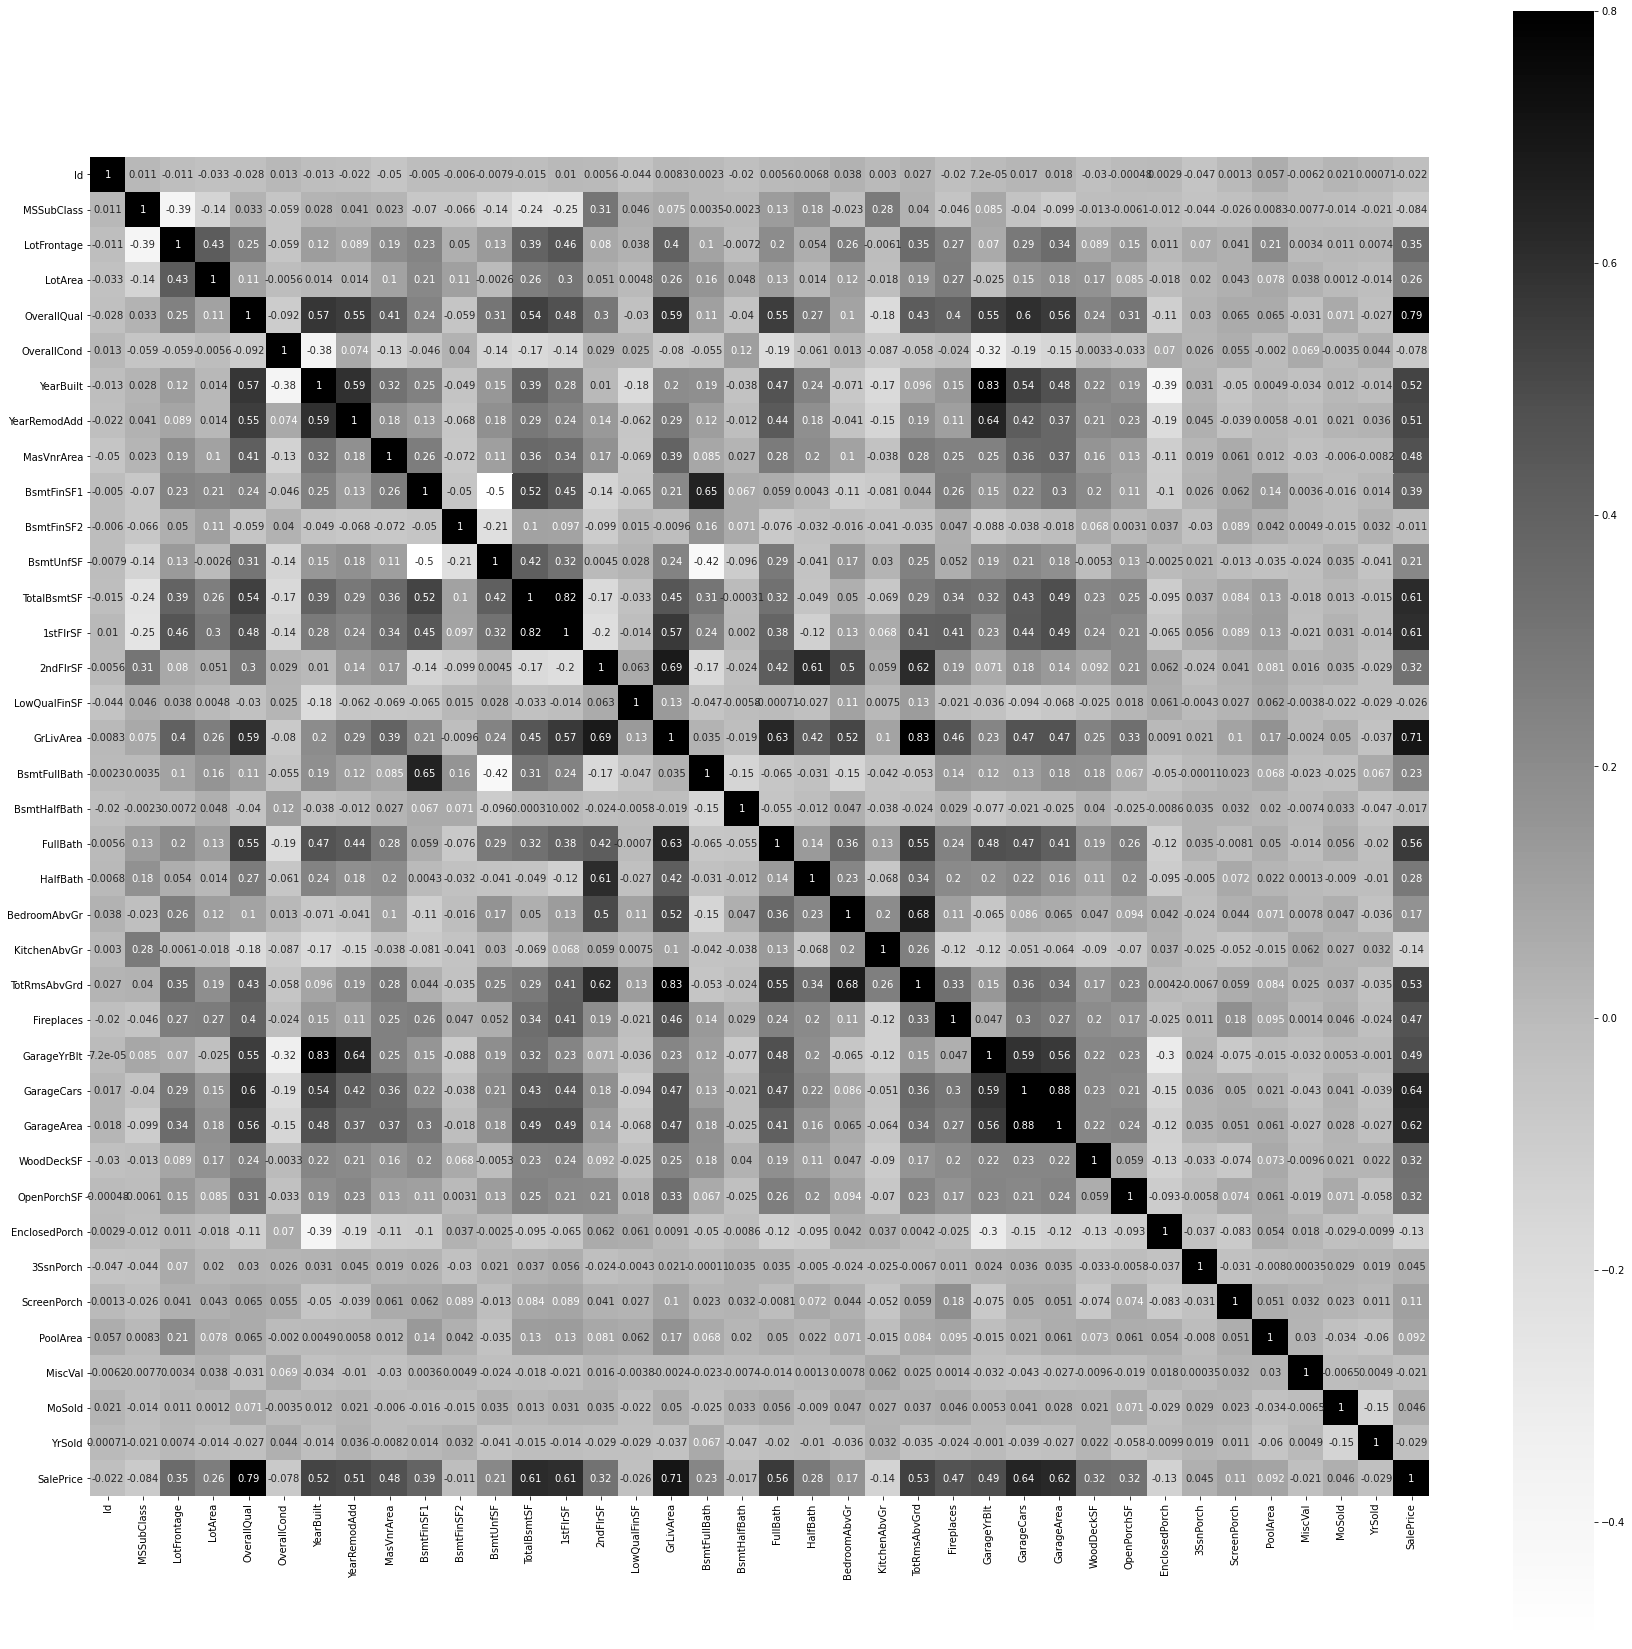

In [6]:
f, ax = plt.subplots(figsize=(30, 30)) #mapa de calor das correlações
sns.heatmap(corr,  vmax=.8,square=True, annot=True, cmap='Greys')

Há muitos dados na tabela e gráfico que deixam a visualização um pouco confusa. Quanto mais escuro maior a correlação positiva e quanto mais claro maior a correlação negativa.
Então, podemos notar algumas correlações altas com valores maiores ou iguais a 0,8.

Vamos agora investigar as maiores correlações com a variável SalePrice.

In [7]:
#variáveis com maiores correlações com a variável alvo SalePrice
maiores_corr = corr.index[abs(corr["SalePrice"])>0.5] #pegando o nome das colunas com correlação > |0.5| cm a variável SalesPrice
maiores_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

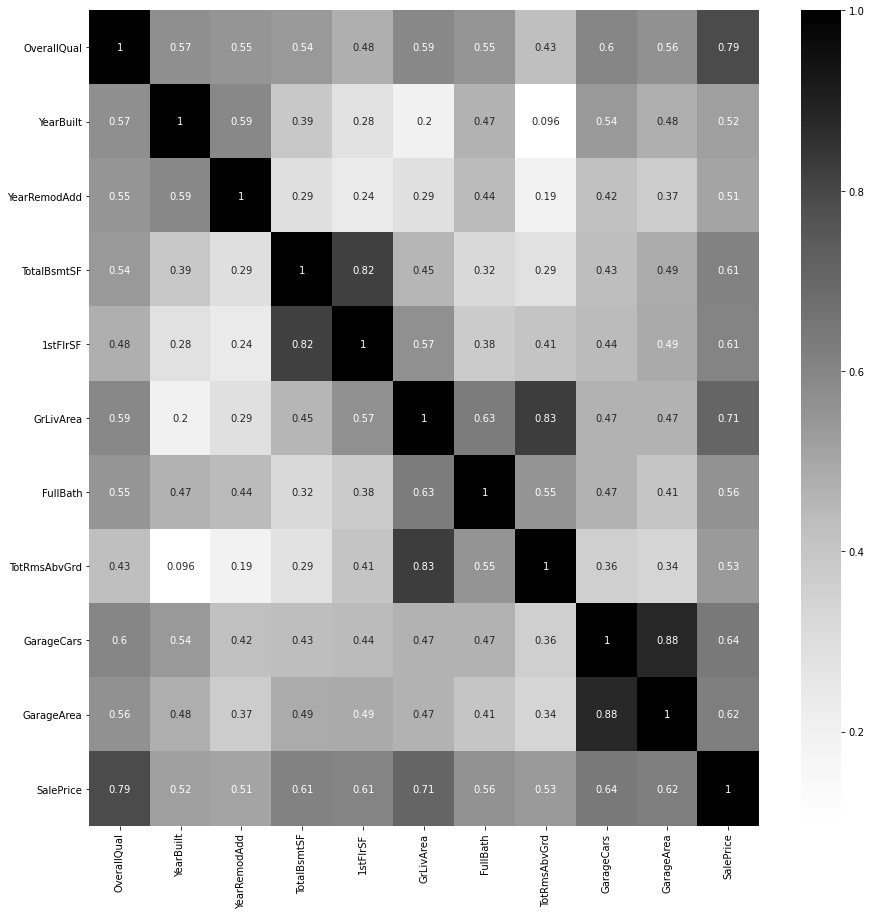

In [8]:
#Criando um heatmap de correlação com as variáveis >|0,5| com SalePrice
plt.figure(figsize=(15,15))
ax = sns.heatmap(train[maiores_corr].corr(),annot=True,cmap="Greys")

Podemos observar no gráfico acima que:
- 'OverQual' possui correlação de 0,79 com o Preço de Venda.
- 'GarageCars' X 'GarageArea' tem correlação entre elas de  0.88, que é lógico e até esperado. Logo não é necessário ter as duas no modelo.
--  A variável 'GrLivArea' possui boa correlação com Sales Price, então a manteremos para o modelo.
- 'TotalBsmtSF' (Total square feet of basement area) & '1stFlrSF'(1stFlrSF: First Floor square feet) possuem correlação de 0,82. 
-- Como essa variáveis são áreas, podemos criar uma outra variável somando-as e assim não perder informação. Nesse caso é importante verificar se há mais 'andares' como informação, e há!: '2stFlrSF': Second floor square feet
- 'TotRmsAbvGrd'(Total rooms above grade (does not include bathrooms) & 'GrLivArea' também possuem forte correlação (0.83). Excluiremo a primeira já que a segunda tem uma correlação melhor com a SalePrice, e parto do pressuposto que 'GrLivArea' inclui 'TotRmsAbvGrd' +  include bathrooms.

**Variáveis que serão excluídas: 'GarageCars','TotRmsAbvGrd'**

**Variáveis que serão somadas: 'TotalBsmtSF','1stFlrSF','2stFlrSF'.**

In [13]:
#investigando melhor as variáveis 
corr.SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

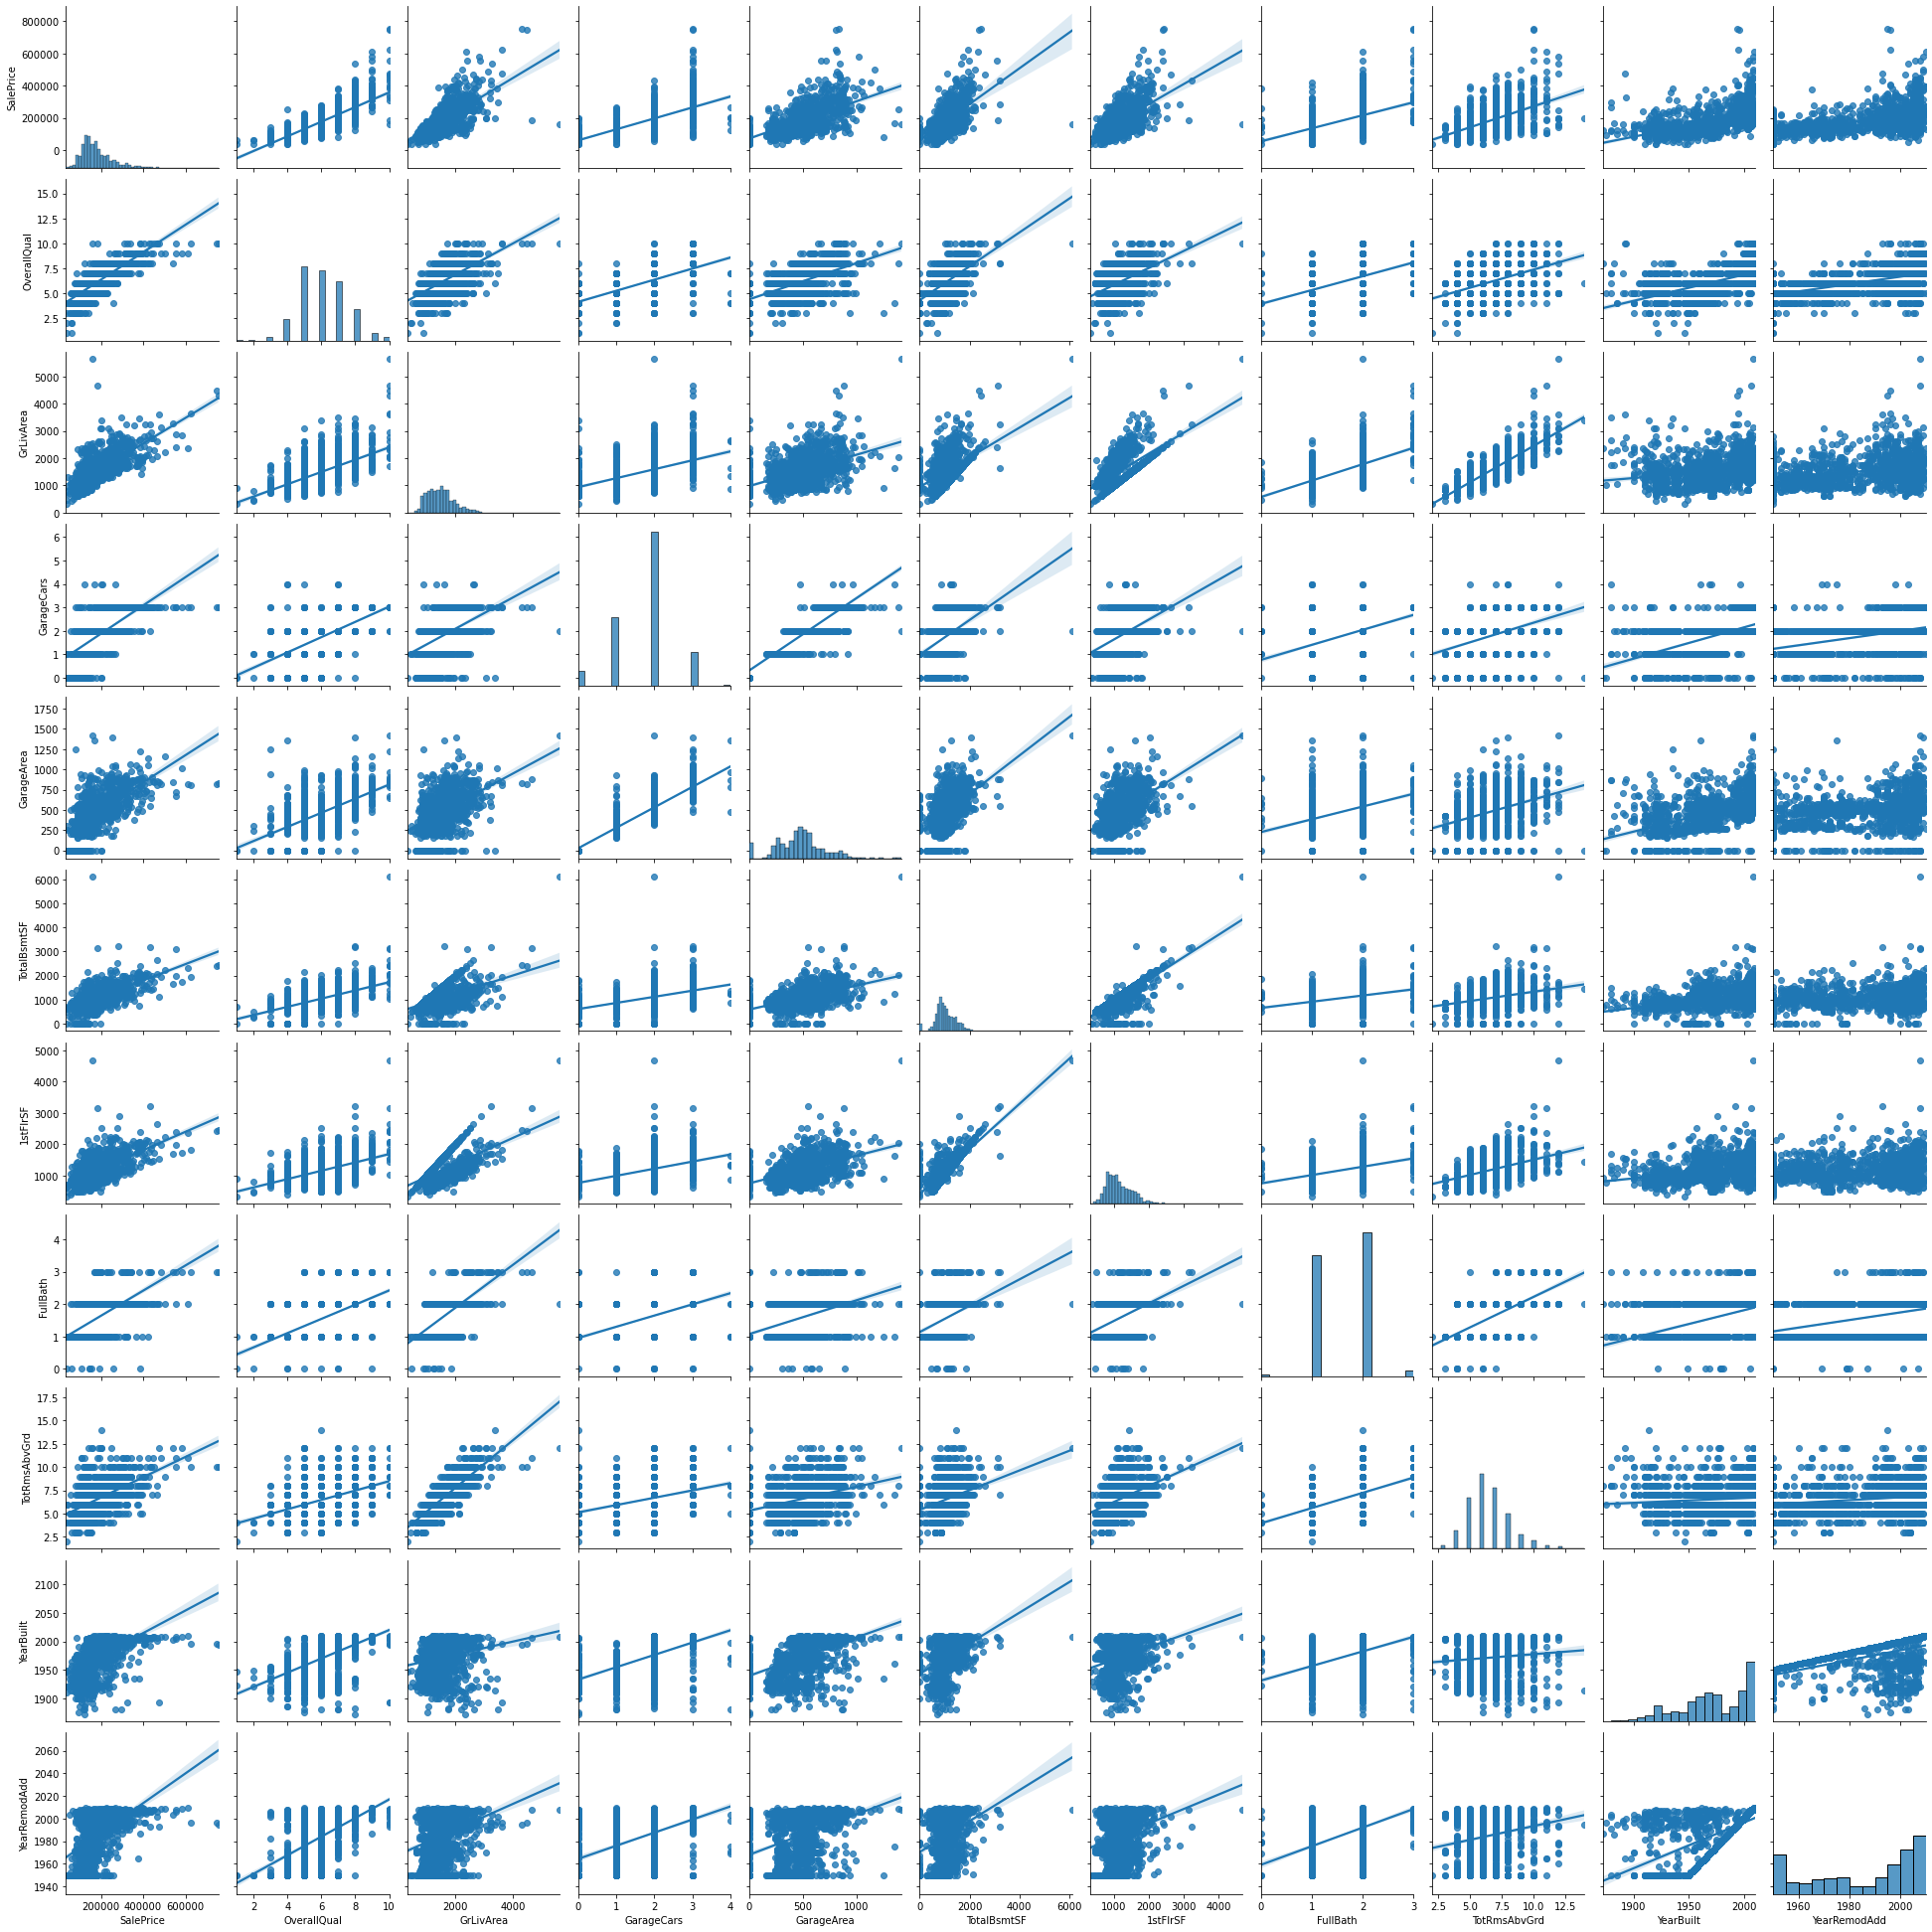

In [10]:
#investigando como os dados como maior correlação se comportam em relação umas as outras
sns.pairplot(train[corr.SalePrice.sort_values(ascending=False).index[0:11]], kind='reg')

## **2.3 - Investigando outras correlações**

In [11]:
outr_corr = (corr[corr > 0.8]).sum().sort_values(ascending=False) #maiores que 1 estão altamente correlacionadas
outr_corr

GarageCars       1.882475
GarageArea       1.882475
GarageYrBlt      1.825667
YearBuilt        1.825667
TotRmsAbvGrd     1.825489
GrLivArea        1.825489
1stFlrSF         1.819530
TotalBsmtSF      1.819530
Id               1.000000
WoodDeckSF       1.000000
Fireplaces       1.000000
OpenPorchSF      1.000000
BedroomAbvGr     1.000000
EnclosedPorch    1.000000
3SsnPorch        1.000000
ScreenPorch      1.000000
PoolArea         1.000000
MiscVal          1.000000
MoSold           1.000000
YrSold           1.000000
KitchenAbvGr     1.000000
FullBath         1.000000
HalfBath         1.000000
MSSubClass       1.000000
BsmtHalfBath     1.000000
BsmtFullBath     1.000000
LowQualFinSF     1.000000
2ndFlrSF         1.000000
BsmtUnfSF        1.000000
BsmtFinSF2       1.000000
BsmtFinSF1       1.000000
MasVnrArea       1.000000
YearRemodAdd     1.000000
OverallCond      1.000000
OverallQual      1.000000
LotArea          1.000000
LotFrontage      1.000000
SalePrice        1.000000
dtype: float

In [12]:
outr_corr[outr_corr > 1] #filtrandoa > 1

GarageCars      1.882475
GarageArea      1.882475
GarageYrBlt     1.825667
YearBuilt       1.825667
TotRmsAbvGrd    1.825489
GrLivArea       1.825489
1stFlrSF        1.819530
TotalBsmtSF     1.819530
dtype: float64

As variáveis YearBuilt e GarageYrBlt são temporais. Vamos investigá-las.
As demais já foram analisadas na seção anterior.

## **2.3 - Investigando as variáveis temporais**

In [14]:
variaveis_temporais = [x for x in train if "Year" in x or "Yr" in x] 
#list comprehension, gera uma lista com valores x, se x no data set train  tiver 'Year' ou 'Yr' no nome da coluna
print(variaveis_temporais)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0.5, 1.05, 'Dispersão entre as Variáveis de Tempo')

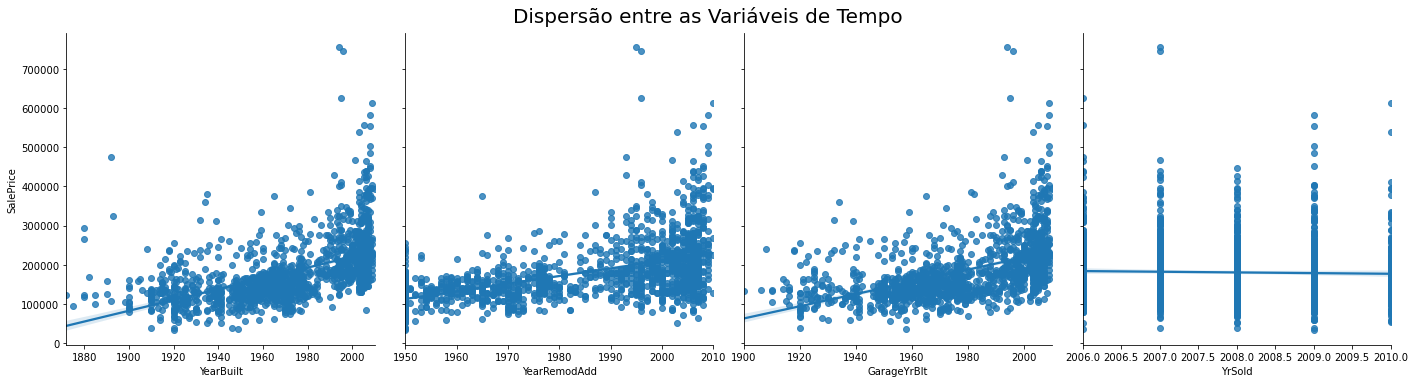

In [15]:
ax = sns.pairplot(train, y_vars='SalePrice', x_vars=variaveis_temporais, height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis de Tempo', fontsize=20, y=1.05)

Observamos uma tendência de crescimento ao longo do tempo nos 3 primeiros gráficos.

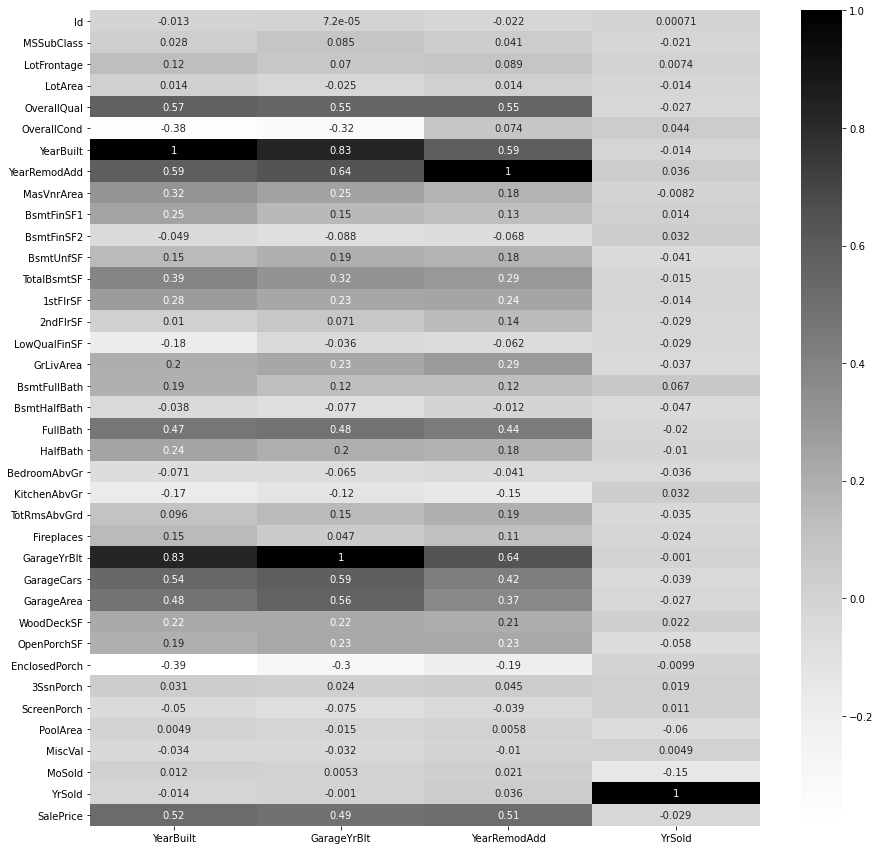

In [16]:
temp_vars=corr[['YearBuilt','GarageYrBlt', 'YearRemodAdd', 'YrSold']]
plt.figure(figsize=(15,15))
ax = sns.heatmap(temp_vars,annot=True,cmap="Greys")

YearBuilt e GarageYrBlt possuem alta correlação.

Como a YearBuilt tem maior correlação com a SalePrice, excluíremos a GarageYrBlt.

# **3 - Tratando os dados faltantes**
A seguir preencheremos os dados faltantes, modificaremos a variável MSSubClass e excluiremos as variáveis correlacionadas da seção anterior.

Para facilitar as análises e mudanças juntaremos os datasets test e train, quando finalizados os separaremos novamente em datasets já prontos para aplicação aos modelos.

## **3.1 Juntando os os datasets e separando a variável alvo**

In [17]:
# Salvanso os índices para juntar no final
train_index= train.shape[0]
test_index = test.shape[0]

In [18]:
#separando a variável alvo que será analisada na seção 3 e a y_train será entrada nos modelos.
y_train = train.SalePrice.copy()
Id = test['Id'].copy() #será usado na submissão no Kaggle

In [19]:
train.drop(['SalePrice'], axis=1, inplace=True)#excluindo a variável alvo

In [20]:
#juntando os datasets
tudo_junto = pd.concat([train, test], axis=0, sort=False)
tudo_junto.shape #soma das linhas do train e test

(2919, 80)

In [22]:
tudo_junto.drop(['Id'], axis=1, inplace=True) 
#excluindo a coluna Id que não será útil nas análises e nem no modelo

In [23]:
tudo_junto.shape

(2919, 79)

## **3.2 - Verificando e  preenchendo valores faltantes**

> Verificamos os valores que estão ausentes para decidirmos o que fazer com eles posteriormente. Para facilitar verificamos separadamente cada tipo de variável.

### 3.2.1 - Variáveis Categóricas

In [24]:
tudo_junto_cat = tudo_junto.select_dtypes(include='object')

In [25]:
valores_faltantes = tudo_junto_cat.isna().sum().sort_values(ascending=False)
valores_faltantes_percentual= tudo_junto_cat.isna().sum().sort_values(ascending=False)/tudo_junto.shape[0] * 100

valores_falt_cat= pd.DataFrame({"valores_faltantes":valores_faltantes, "valores_faltantes_percentual":valores_faltantes_percentual})
valores_falt_cat.head(20)

,valores_faltantes,valores_faltantes_percentual
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageFinish,159,5.447071
GarageType,157,5.378554
BsmtExposure,82,2.809181


Notamos que as 5 primeiras variáveis estão com mais de 48% dos dados ausentes.
Manter os dados assim não os tornam úteis para a construção dos modelos, portanto os exluiremos.

In [26]:
#filtro para copiar o nome das colunas
col_falt = (valores_falt_cat[valores_falt_cat['valores_faltantes_percentual'] > 6]).index
col_falt

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [27]:
tudo_junto.drop(col_falt, axis=1, inplace=True)

In [28]:
#Confirmando que estão com 5 colunas a menos
print(tudo_junto.shape)

(2919, 74)


Agora vamos investigar as demais variáveis categóricas com valores faltantes.

In [29]:
#filtro para copiar o nome das colunas
col_falt =valores_falt_cat[(valores_falt_cat['valores_faltantes_percentual'] > 0) & (valores_falt_cat['valores_faltantes_percentual']  < 6)].index

In [30]:
dados_falt = tudo_junto[col_falt]
dados_falt.head()

,GarageCond,GarageQual,GarageFinish,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MSZoning,Utilities,Functional,Exterior2nd,Exterior1st,SaleType,KitchenQual,Electrical
0,TA,TA,RFn,Attchd,No,TA,Gd,Unf,GLQ,BrkFace,RL,AllPub,Typ,VinylSd,VinylSd,WD,Gd,SBrkr
1,TA,TA,RFn,Attchd,Gd,TA,Gd,Unf,ALQ,None,RL,AllPub,Typ,MetalSd,MetalSd,WD,TA,SBrkr
2,TA,TA,RFn,Attchd,Mn,TA,Gd,Unf,GLQ,BrkFace,RL,AllPub,Typ,VinylSd,VinylSd,WD,Gd,SBrkr
3,TA,TA,Unf,Detchd,No,Gd,TA,Unf,ALQ,None,RL,AllPub,Typ,Wd Shng,Wd Sdng,WD,Gd,SBrkr
4,TA,TA,RFn,Attchd,Av,TA,Gd,Unf,GLQ,BrkFace,RL,AllPub,Typ,VinylSd,VinylSd,WD,Gd,SBrkr


In [31]:
#obtenho os valores únicos em cada coluna
for i in dados_falt.columns:
  print(i,  dados_falt[i].unique())

GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Utilities ['AllPub' 'NoSeWa' nan]
Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan]
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' nan]
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]
SaleType ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'Con

Leva um pouco de tempo mas é importante entender o que cada coluna armazena e o valor que atribuído para a **tomada de decisão em relação aos valores ausentes**. Consulte o que significa cada abreviação no arquivo data_description que possibilita entender o nome da coluna e os valores atribuídos.
**Sabendo o significado de cada variável e como cada casa é classificada de acordo com o atributo, podemos tomar decisões para proceder em relação aos dados faltantes. Nos gráficos abaixo veremos as características mais se repetem em cada variável.**

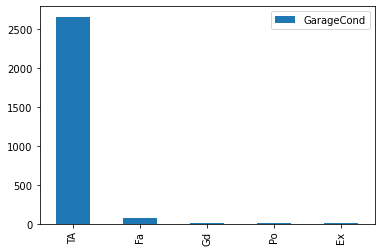

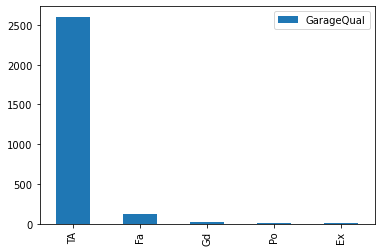

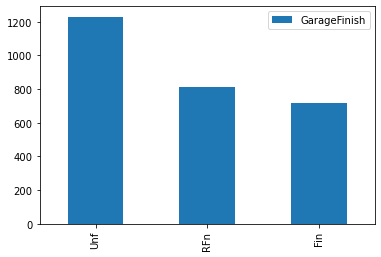

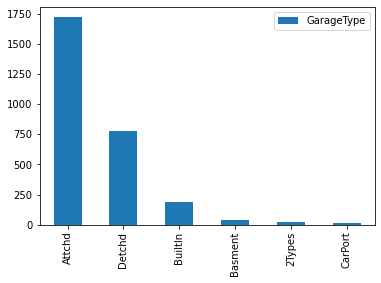

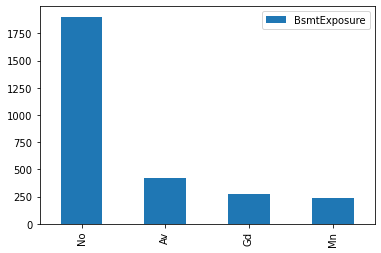

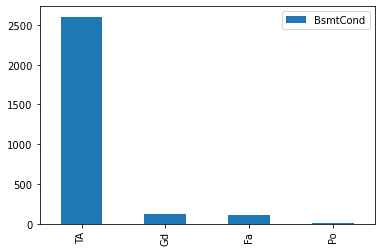

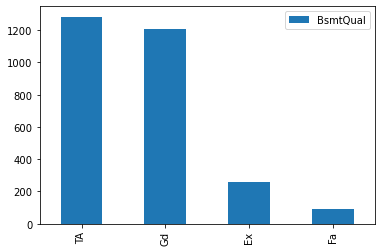

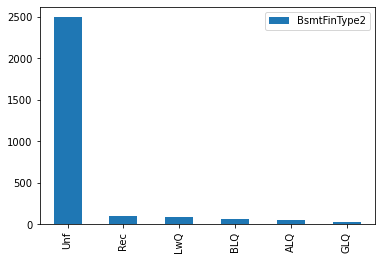

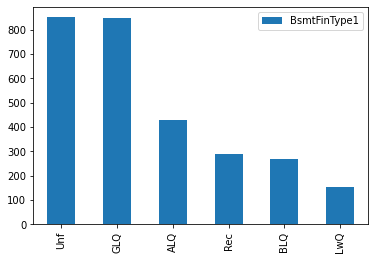

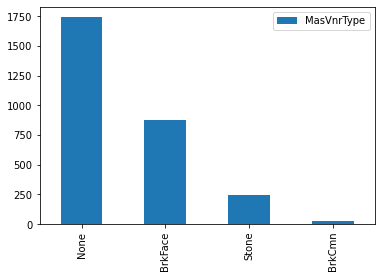

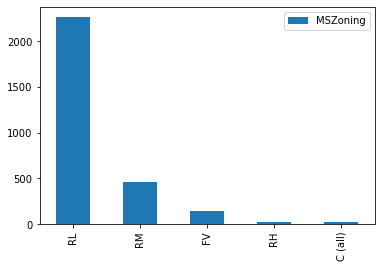

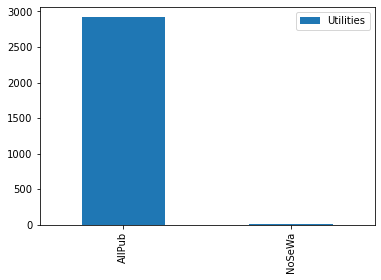

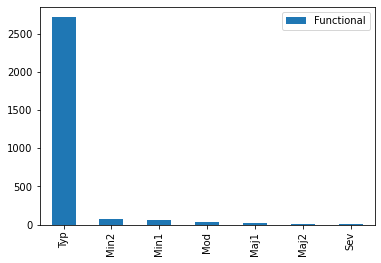

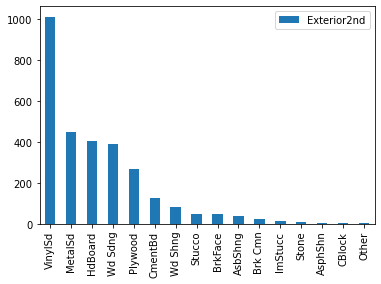

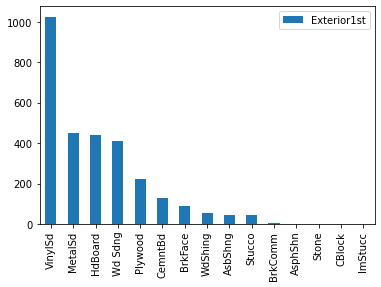

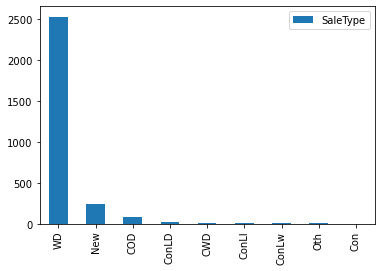

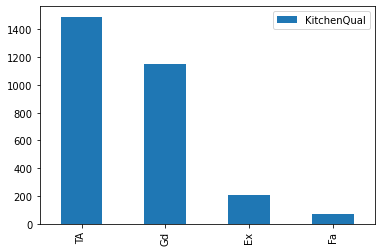

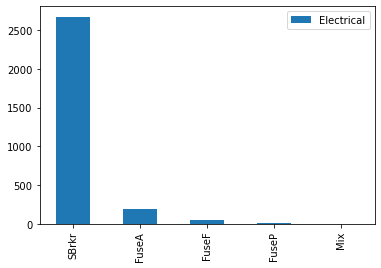

In [32]:
#gráficos de barras da frequência de cada valor categórico em cada variável
for x in dados_falt.columns:
  
  pd.DataFrame(dados_falt[x].value_counts()).plot.bar()

Observamos nos gráficos de cada classe um dos valoress se destaca. Então, preencheremos os valores faltantes com o atributo mais frequente.
Mas poderiam ser adotados outros critérios como, por exemplo, colocar None supondo que a casa não teria o item que está faltando.

A variável Utilities possui praticamente um 'valor constante', como valores constantes não influenciam nas predições, vamos excluí-la.

In [33]:
dados_falt.isna().sum()

GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtExposure     82
BsmtCond         82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
Exterior2nd       1
Exterior1st       1
SaleType          1
KitchenQual       1
Electrical        1
dtype: int64

In [35]:
#preenchendo os valores nulos & faltantes
for x in dados_falt.columns:
  a = dados_falt[x].value_counts()
  mais_freq = a.index[0]
  #print(mais_freq)
  tudo_junto[x].fillna(value=mais_freq, inplace=True)

In [36]:
#excluindo a coluna Utilities
tudo_junto.drop('Utilities', axis=1, inplace=True)

In [37]:
#confirmando que todos os valores foram preenchidos e não há mais nulos nas variáveis categóricas
tudo_junto.select_dtypes(include = ['object']).isna().sum().sort_values(ascending=False)

MSZoning         0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtCond         0
Foundation       0
Street           0
ExterCond        0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
SaleCondition    0
dtype: int64

### **3.2.2 - Variáveis Numéricas**


In [39]:
tudo_junto_num = tudo_junto.select_dtypes(exclude='object')
valores_faltantes = tudo_junto_num.isna().sum().sort_values(ascending=False)
valores_faltantes_percentual= tudo_junto_num.isna().sum().sort_values(ascending=False)/tudo_junto.shape[0] * 100

valores_falt_num= pd.DataFrame({"valores_faltantes":valores_faltantes, "valores_faltantes_percentual":valores_faltantes_percentual})
valores_falt_num.head(20)

,valores_faltantes,valores_faltantes_percentual
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
MasVnrArea,23,0.787941
BsmtHalfBath,2,0.068517
BsmtFullBath,2,0.068517
TotalBsmtSF,1,0.034258
GarageCars,1,0.034258
BsmtFinSF1,1,0.034258
BsmtFinSF2,1,0.034258
BsmtUnfSF,1,0.034258


Há mais de 16% de valores faltantes na Variável LotFrontage, 5% na Garage YrBlt e 0,78 % na MasVnrArea e muito pouco nas demais. Podemos exluir a coluna LotFrontage e prencher os demais dados.

In [41]:
tudo_junto.drop(["LotFrontage"], axis=1, inplace=True)

KeyError: "['LotFrontage'] not found in axis"

In [42]:
col_falt = (valores_falt_num[(valores_falt_num['valores_faltantes_percentual'] > 0) & (valores_falt_num['valores_faltantes_percentual']  < 6)].index)
col_falt

Index(['GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath',
       'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'GarageArea'],
      dtype='object')

array([[<AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

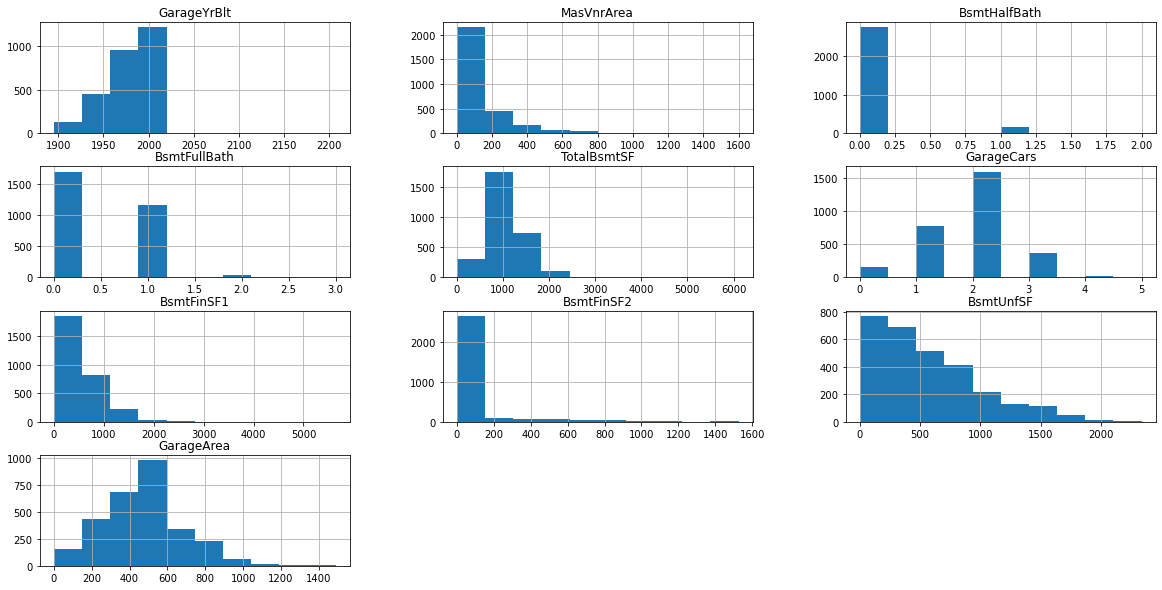

In [43]:
#analisando as colunas
dados_falt = tudo_junto[col_falt]
dados_falt.hist(figsize=(20,10))

In [44]:
dados_falt.describe()

,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath,TotalBsmtSF,GarageCars,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GarageArea
count,2760.000000,2896.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,1978.113406,102.201312,0.061364,0.429894,1051.777587,1.766621,441.423235,49.582248,560.772104,472.874572
std,25.574285,179.334253,0.245687,0.524736,440.766258,0.761624,455.610826,169.205611,439.543659,215.394815
min,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,0.000000,0.000000,0.000000,793.000000,1.000000,0.000000,0.000000,220.000000,320.000000
50%,1979.000000,0.000000,0.000000,0.000000,989.500000,2.000000,368.500000,0.000000,467.000000,480.000000
75%,2002.000000,164.000000,0.000000,1.000000,1302.000000,2.000000,733.000000,0.000000,805.500000,576.000000
max,2207.000000,1600.000000,2.000000,3.000000,6110.000000,5.000000,5644.000000,1526.000000,2336.000000,1488.000000


Notamos pelo gráfico que a distribuição dessas duas variáveis são assimétricas para a direita e esquerda.

Na coluna GarageYrBlt vemos que a média está próxima aos 50% dos valores acima e abaixo, portanto adotaremos a média nese caso.

Já na coluna MasVnrArea observamos que 75% dos valores estão acima de 166. Adotarei esse valor nessse caso.

BsmtFullBath e BsmtHalfBath adotaremos o 0.

In [48]:
tudo_junto['GarageYrBlt'].fillna(value=train['GarageYrBlt'].mean(), inplace=True)

In [49]:
tudo_junto['MasVnrArea'].fillna(value=166, inplace=True)

In [50]:
colunas =['BsmtFullBath', 'BsmtHalfBath','GarageArea', 'TotalBsmtSF', 'BsmtUnfSF',
          'BsmtFinSF2', 'GarageCars','BsmtFinSF1']
for x in colunas:
  a = 0
  tudo_junto[x].fillna(value=0, inplace=True)

In [51]:
#confirmando
tudo_junto.select_dtypes(exclude='object').isna().sum().sort_values(ascending=False)

MSSubClass       0
WoodDeckSF       0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
HalfBath         0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
BedroomAbvGr     0
FullBath         0
LotArea          0
BsmtFinSF2       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
BsmtHalfBath     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
YrSold           0
dtype: int64

## **3.3 Coluna MSSUbClass**
É uma coluna categórica  representada por números como pode ser verificado no arquivo description, então vamos substituir os valores numéricos por valores categóricos.

In [52]:
MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}

In [53]:
tudo_junto['MSSubClass']= tudo_junto.MSSubClass.map(MSSUbCLass)

In [54]:
#conferindo a mudança
tudo_junto.MSSubClass

0                  2-STORY 1946 & NEWER
1       1-STORY 1946 & NEWER ALL STYLES
2                  2-STORY 1946 & NEWER
3                  2-STORY 1945 & OLDER
4                  2-STORY 1946 & NEWER
                     ...               
1454         2-STORY PUD - 1946 & NEWER
1455         2-STORY PUD - 1946 & NEWER
1456    1-STORY 1946 & NEWER ALL STYLES
1457                        SPLIT FOYER
1458               2-STORY 1946 & NEWER
Name: MSSubClass, Length: 2919, dtype: object

## **3.4 Tratando as colunas correlacionadas da seção 2**

**Variáveis que serão excluídas: 'GarageCars','TotRmsAbvGrd', 'GarageYrBlt'**

**Variáveis que serão somadas: 'TotalBsmtSF','1stFlrSF','2stFlrSF'.**

In [55]:
#excluiindo as variáveis 
tudo_junto.drop(['GarageCars','TotRmsAbvGrd', 'GarageYrBlt'], axis=1, inplace=True)

In [56]:
#criando uma nova coluna
tudo_junto['TotalBsmtSF1stFlrSF2stFlrSF'] = tudo_junto['TotalBsmtSF'] + tudo_junto['1stFlrSF'] + tudo_junto['2ndFlrSF']

In [57]:
#excluindo as colunas individuais já que estão representadas numa só
tudo_junto.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

In [58]:
#salvando para iniciar a partir dqui e não ter que rodar o kernel novamente

tudo_junto.to_csv("tudo_junto_1.csv")

# **4 - Feature Engineering**

Nesta seção normalizaremos as variáveis e converteremos as variáveis categóricas em numéricas por meio da função pd.get_dummies. Não obstante, há outras técnicas para essa última operação como Label Encoding e One Encoder que deixamos o artigo abaixo para consulta.

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

## **4.1 - Normalização da variável alvo SalePrice**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SalePrice'>

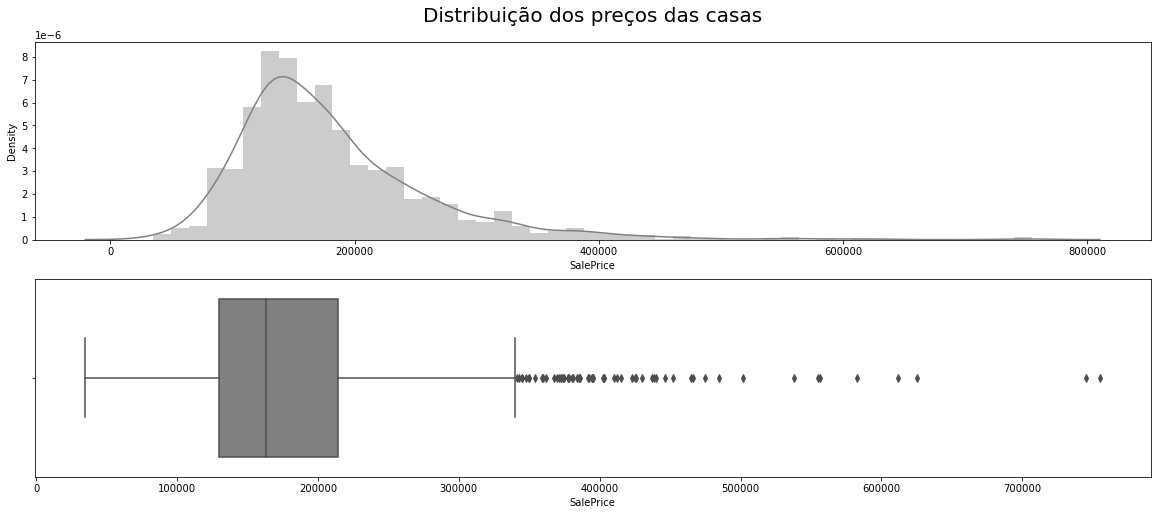

In [59]:
fig, (ax1, ax2 )= plt.subplots(2,1,figsize=(20, 8))

ax=sns.distplot(y_train, ax= ax1, color='grey')
ax.set_title("Distribuição dos preços das casas", fontsize=20,pad=20,)

sns.boxplot(y_train, orient='h', color='grey', ax=ax2)

In [60]:
display(f"Assimetria: {y_train.skew().round(2)}")
display(f"Curtose: {y_train.kurt().round(2)}")

'Assimetria: 1.88'

'Curtose: 6.54'

Como podemos observar nos gráficos acima e nos valores Skewness e Kurtosis, o valor de venda possuui assimetria para a direita ou positiva, isto é, o valor de venda não se comporta como uma 'normal'.

Para obtermos melhores resultados com nossos modelos é importante  corrigirmos a assimetria ao representar os valores de venda como logaritmos.

**Skewness (Assimetria)** *'Numa distribuição estatísstica, a assimetria é o quanto sua curva de frequência se desvia ou se afasta da posiçãoo simétrica.'*

**Kurtosis (Curtose ou achatamento)** *'mede a concentração ou dispersão dos valores de um conjunto de valores em relação as medidas de tendência central em uma distribuição de frequências conhecida
(a distribuição Normal)'.*

[Explicação de Curtose e Assimetria](http://www.uel.br/pessoal/lscunha/pages/arquivos/uel/Economia%20Noturno/Aula%206%20-%20Assimetria%20e%20Curtose(1).pdf)

In [61]:
#transformando os valores em logaritmo
y_train= np.log1p(y_train)
y_train.to_csv("ytrain_log.csv")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SalePrice'>

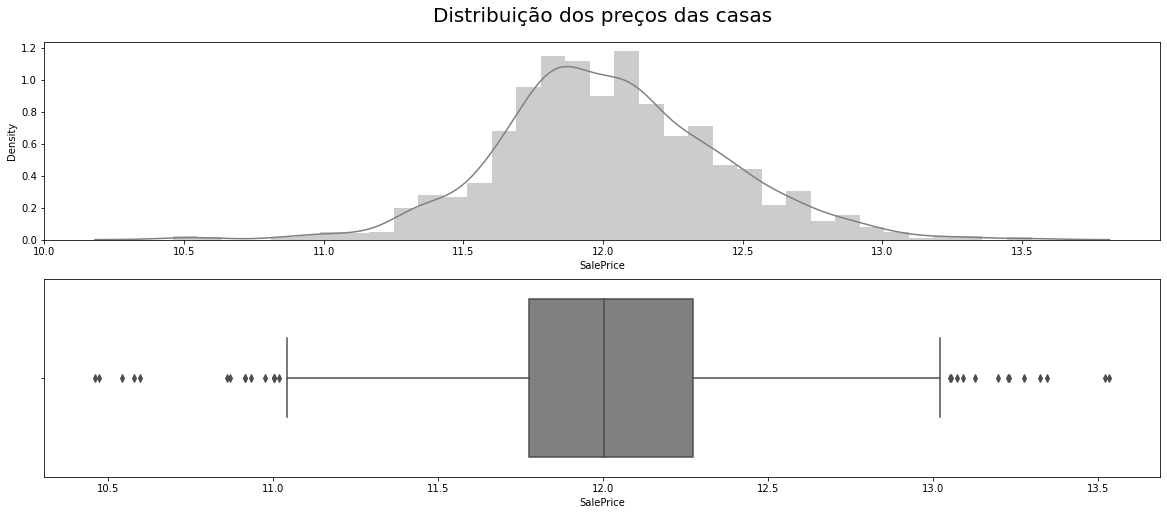

In [62]:
fig, (ax1, ax2 )= plt.subplots(2,1,figsize=(20, 8))

ax=sns.distplot(y_train,color='grey', ax=ax1)
ax.set_title("Distribuição dos preços das casas", fontsize=20,pad=20,)

sns.boxplot(y_train, orient='h', color='grey')

In [63]:
display(f"Assimetria: {y_train.skew().round(2)}")
display(f"Curtose: {y_train.kurt().round(2)}")

'Assimetria: 0.12'

'Curtose: 0.81'

Com a transformação dos valores em logaritmo realizamos os novos cálculos para curtose e simetria vemos que os valores estão próximos de uma distribuição normal e com isso podemos seguir com nosso modelo.

## **4.2 - Fazendo a normalização das variáveis explicativas numéricas**

Similar ao que fizemos com a variável alvo SalePrice, normalizaremos as demais variáveis dos 2 data sets.

In [64]:
col_num = tudo_junto.select_dtypes(exclude='object').columns #nomesvariáveis numérica
#listando as variáveis assimétricas
assimetria = tudo_junto[col_num].skew().sort_values(ascending=False)
assimetria = assimetria[abs(assimetria) > 0.5]
assimetria

MiscVal                        21.958480
PoolArea                       16.907017
LotArea                        12.829025
LowQualFinSF                   12.094977
3SsnPorch                      11.381914
KitchenAbvGr                    4.304467
BsmtFinSF2                      4.148275
EnclosedPorch                   4.005950
ScreenPorch                     3.948723
BsmtHalfBath                    3.933616
MasVnrArea                      2.600902
OpenPorchSF                     2.536417
WoodDeckSF                      1.843380
TotalBsmtSF1stFlrSF2stFlrSF     1.512256
BsmtFinSF1                      1.425963
GrLivArea                       1.270010
BsmtUnfSF                       0.919812
Fireplaces                      0.733872
HalfBath                        0.694924
BsmtFullBath                    0.625153
OverallCond                     0.570605
YearBuilt                      -0.600114
dtype: float64

In [65]:
for x in assimetria.index:
  tudo_junto[x] = np.log1p(tudo_junto[x])

## **4.3 - Convertendo os valores categóricos em valores numéricos**

In [66]:
tudo_junto = pd.get_dummies(tudo_junto)
tudo_junto.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,0.0,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,0.0,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,0.0,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,0.0,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,0.0,...,0,0,0,1,0,0,0,0,1,0


## **4.4 - Separando os data sets train e test**

In [67]:
x_train =tudo_junto[:train_index] #usaremos em nosso modelo
x_test_competição = tudo_junto[train_index:]
print(x_train.shape)
print(x_test_competição.shape)

(1460, 277)
(1459, 277)


In [68]:
#salvandox_train_modelos caso precisar reiniciar o projeto a partir deste ponto
x_train.to_csv("x_train_modelos.csv")
x_test_competição.to_csv('x_test_competição.csv')

# **5 - Modelos**
Usaremos 4 modelos e compararemos o coeficiente de correlação, o erro quadrático médio e sua raiz. Em cada seção deixaremos links de artigos que explicam o funcionamento e as alterações dos parâmetros que nesse projeto optamos variar apenas 2 deles.
O modelo Decision Tree será usado como modelo base. 

## **5.1 - DataFrame para comparar os modelos e bibliotecas utilizadas**

In [69]:
comparacao_modelos = pd.DataFrame(columns=['Modelo','R²','EQM',"REQM"]) 
# Esse Data Frame tem o objetivo de armazenar os valores das métricas para facilitar a comparação dos valores.

#essa função armazenará, classificará por ordem de melhor desempenho o nome do modelo e sua acurácia.
def comparar(Nome_do_modelo,R2,EQM,REQM):  

  global comparacao_modelos

  comparacao_modelos = comparacao_modelos.append({'Modelo': Nome_do_modelo, 'R²': R2,'EQM':EQM,'REQM':REQM }, ignore_index=True)

  #Colocando em ordem crescente por REQM porquê a competição utiliza essa métrica

  comparacao_modelos.sort_values(ascending=True, by='REQM', inplace=True)

  comparacao_modelos.drop_duplicates(inplace=True) # para caso duplicar uma linha sem querer :)
  
  display(comparacao_modelos) 

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

Separamos as amostras de teste nos modelos com as iniciais maiúsculas. Não confundir com o dataset que será enviado para a competição, que chamamos de x_test_competição. 

Separaremos os dados de treino em dados de teste e dados de treinamento com a função *train_test_split*.

Há outros métodos de validação como o K-fold cross Validations, se hover interes você pode encontrar nos códigos da competição.

In [72]:
#separar amostra de treino e teste
#Usaremos 90% de nossos dados para treinamento e os outros 10% para teste.
X_train,X_test,Y_train,Y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=2021)

## **5.2 - Decision Tree**
[Artigo sobre árvore de Decisão - conteúdo em inglês](https://https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054)

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
params=pd.DataFrame() #variamos a escolha de 2 parâmetros para escolher a combinação que tem melhor desempenho. 
for i in [10,15,20,50,100]:
  for x in [2,3,4]:
    tree_reg = DecisionTreeRegressor(random_state=2021, max_depth=i,min_samples_split=x)
    tree_reg.fit(X_train,Y_train)
    R2 = tree_reg.score(X_train,Y_train)
    params = params.append({'max_depth':i,"min_samples_split":x, 'R2':R2}, ignore_index=True)
display(params.sort_values(by='R2', ascending=False))

,R2,max_depth,min_samples_split
9,1.000000,50.0,2.0
12,1.000000,100.0,2.0
6,1.000000,20.0,2.0
3,0.999648,15.0,2.0
10,0.998117,50.0,3.0
13,0.998117,100.0,3.0
7,0.998117,20.0,3.0
4,0.997791,15.0,3.0
8,0.993494,20.0,4.0
11,0.993494,50.0,4.0


In [75]:
#aplicando na amostra de X_teste
#De acordo com a tabela de variação de parâmetros  maxdepth=20 e min_samples_split=2

tree_reg = DecisionTreeRegressor(random_state=2021, max_depth=20,min_samples_split=2)
tree_reg.fit(X_train,Y_train)
y_predict_tree =((tree_reg.predict(X_test)))

In [76]:
#Calculando para a amostra de Teste
EQM = mean_squared_error(Y_test,y_predict_tree).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = (tree_reg.score(X_test,Y_test)).round(4)

comparar('Decision Tree',R2,EQM,REQM)

,Modelo,R²,EQM,REQM
0,Decision Tree,0.7305,0.0343,0.1852


In [77]:
# gerando o arquivo de submissão na competição
y_predict_tree_I = np.expm1(tree_reg.predict(x_test_competição))
y_predict_tree_I

sub_tree_I = pd.DataFrame({'Id':Id,'SalePrice':y_predict_tree_I})
sub_tree_I.to_csv('sub_tree_I.csv', index=False)

## **5.3 - Random Forest Regression**

[Artigo sobre Random Forest - conteúdo em Inglês](https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f)

https://heartbeat.fritz.ai/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153

https://medium.com/turo-engineering/how-not-to-use-random-forest-265a19a68576

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
params=pd.DataFrame() 
for i in [5,10,15,20,50,100]:
  for x in [2,3,4]:
    rand_for=RandomForestRegressor(max_depth=i,min_samples_split=x, random_state=2021)
    rand_for.fit(X_train,Y_train)
    R2 = rand_for.score(X_train,Y_train)
    params = params.append({'max_depth':i,"min_samples_split":x, 'R2':R2}, ignore_index=True)
display(params.sort_values(by='R2', ascending=False))

,R2,max_depth,min_samples_split
9,0.982800,20.0,2.0
15,0.982585,100.0,2.0
12,0.982585,50.0,2.0
6,0.982453,15.0,2.0
10,0.981368,20.0,3.0
16,0.981316,100.0,3.0
13,0.981316,50.0,3.0
7,0.981200,15.0,3.0
11,0.979469,20.0,4.0
14,0.979408,50.0,4.0


In [80]:
#De acordo com a tabela de variação de parâmetros  maxdepth=15 e min_samples_split=2
rand_for=RandomForestRegressor(max_depth=50,min_samples_split=2, random_state=2021)
rand_for.fit(X_train,Y_train)
y_predict_rand =((rand_for.predict(X_test)))

In [81]:
EQM = mean_squared_error(Y_test,y_predict_rand).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = (rand_for.score(X_test,Y_test)).round(4)
print(f"EQM = {EQM}, REQM = {REQM}, R² = {R2}",sep='\n')
comparar('Random Forest',R2,EQM,REQM)

EQM = 0.017, REQM = 0.1304, R² = 0.8663


,Modelo,R²,EQM,REQM
1,Random Forest,0.8663,0.0170,0.1304
0,Decision Tree,0.7305,0.0343,0.1852


In [82]:
# gerando o arquivo de submissão na competição
y_predict_rand_I = np.expm1(rand_for.predict(x_test_competição))
y_predict_rand_I

sub_rand_I = pd.DataFrame({'Id':Id,'SalePrice':y_predict_rand_I})
sub_rand_I.to_csv('sub_rand_I.csv', index=False)

## **5.3 - Gradient Boosting**

[Artigo sobre Gradient Boosting - conteúdo em Inglês](https://https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab)

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
params=pd.DataFrame()
for i in [5,10,15,20,50,100]:
  for x in [2,3,4]:
    grad_b = GradientBoostingRegressor(max_depth=i,min_samples_split=x, random_state=2021)
    grad_b.fit(X_train,Y_train)
    R2 = rand_for.score(X_train,Y_train)
    params = params.append({'max_depth':i,"min_samples_split":x, 'R2':R2}, ignore_index=True)
display(params.sort_values(by='R2', ascending=False))

,R2,max_depth,min_samples_split
0,0.982585,5.0,2.0
1,0.982585,5.0,3.0
16,0.982585,100.0,3.0
15,0.982585,100.0,2.0
14,0.982585,50.0,4.0
13,0.982585,50.0,3.0
12,0.982585,50.0,2.0
11,0.982585,20.0,4.0
10,0.982585,20.0,3.0
9,0.982585,20.0,2.0


In [85]:
#De acordo com a tabela de variação de parâmetros  maxdepth=5 e min_samples_split=2
grad_b = GradientBoostingRegressor(max_depth=5,min_samples_split=2, random_state=2021)
grad_b.fit(X_train,Y_train)

y_predict_grad= grad_b.predict(X_test)

In [86]:
EQM = mean_squared_error(Y_test,y_predict_grad).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = (rand_for.score(X_test,Y_test)).round(4)

comparar('Gradient Boosting',R2,EQM,REQM)

,Modelo,R²,EQM,REQM
2,Gradient Boosting,0.8663,0.0149,0.1221
0,Random Forest,0.8663,0.0170,0.1304
1,Decision Tree,0.7305,0.0343,0.1852


In [87]:
# gerando o arquivo de submissão na competição
y_predict_grad_I = np.expm1(grad_b.predict(x_test_competição))
y_predict_grad_I

sub_grad_I = pd.DataFrame({'Id':Id,'SalePrice':y_predict_grad_I})
sub_grad_I.to_csv('sub_grad_I.csv',index=False)

## **5.4 - XGBoost**

In [88]:
from xgboost import XGBRegressor

In [89]:
params=pd.DataFrame()
for i in [5,10,20,50]:
  for x in [100,1000,3000]:
   xgbr = XGBRegressor(max_depth=i, n_estimators=x, random_state=2021)                             
   xgbr.fit(X_train,Y_train)
   R2 = rand_for.score(X_train,Y_train)
   params = params.append({'max_depth':i,"n_estimators":x, 'R2':R2}, ignore_index=True)
display(params.sort_values(by='R2', ascending=False))

,R2,max_depth,n_estimators
0,0.982585,5.0,100.0
1,0.982585,5.0,1000.0
2,0.982585,5.0,3000.0
3,0.982585,10.0,100.0
4,0.982585,10.0,1000.0
5,0.982585,10.0,3000.0
6,0.982585,20.0,100.0
7,0.982585,20.0,1000.0
8,0.982585,20.0,3000.0
9,0.982585,50.0,100.0


In [90]:
#De acordo com a tabela de variação de parâmetros  maxdepth=5 e n_stimator=100
xgbr = XGBRegressor(max_depth=5, n_estimators=100, random_state=2021)                             
xgbr.fit(X_train,Y_train)
y_predict_xgbr = xgbr.predict(X_test)

In [91]:
EQM = mean_squared_error(Y_test,y_predict_xgbr).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = (rand_for.score(X_test,Y_test)).round(4)

comparar('XGB',R2,EQM,REQM)

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8663,0.0149,0.1221
3,XGB,0.8663,0.0164,0.1281
1,Random Forest,0.8663,0.0170,0.1304
2,Decision Tree,0.7305,0.0343,0.1852


In [92]:
# gerando o arquivo de submissão na competição
y_predict_xgbr_I = np.expm1(xgbr.predict(x_test_competição))
y_predict_xgbr_I

sub_xgbr_I = pd.DataFrame({'Id':Id,'SalePrice':y_predict_xgbr_I})
sub_xgbr_I.to_csv('sub_xgbr_I.csv', index=False)

# **6- Gráficos para comparação**
Plotaremos os valores preditos x valores reais em um gráfico de dispersão.

<AxesSubplot:title={'center':'XGB Regressor'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

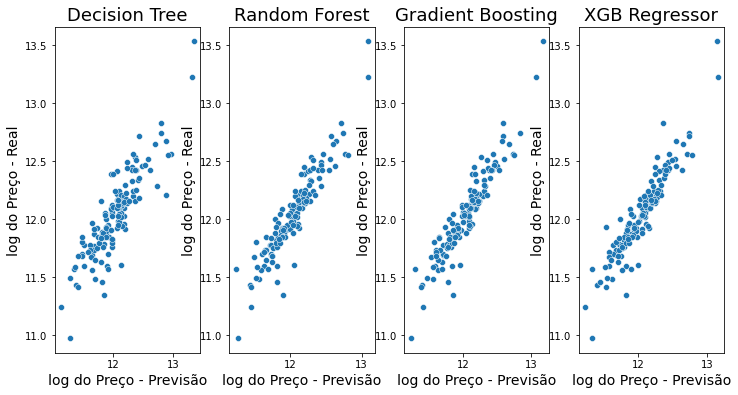

In [95]:
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(100,8))

#Gráfico para comparar o real x estimado

#Decision Tree
ax = sns.scatterplot(x=y_predict_tree, y=Y_test,ax=axis1)
ax.figure.set_size_inches(12, 6)
ax.set_title('Decision Tree', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

#Random Forest
ax = sns.scatterplot(x=y_predict_rand, y=Y_test,ax=axis2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Random Forest', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

#Gradient Boost
ax = sns.scatterplot(x=y_predict_grad, y=Y_test, ax= axis3)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gradient Boosting', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

#XGB
ax = sns.scatterplot(x=y_predict_xgbr, y=Y_test, ax=axis4)
ax.figure.set_size_inches(12, 6)
ax.set_title('XGB Regressor', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

Nos gráficos observamos que os gráficos da direita estão com as bolinhas menos dispersas e o Decision Tree mais dispersas. Observamos também que há um ponto comum aos graficos entre x<12, y<11. Esse ponto 'foge da reta' e não se encaixam ao modelo, provavelmente são outliers.

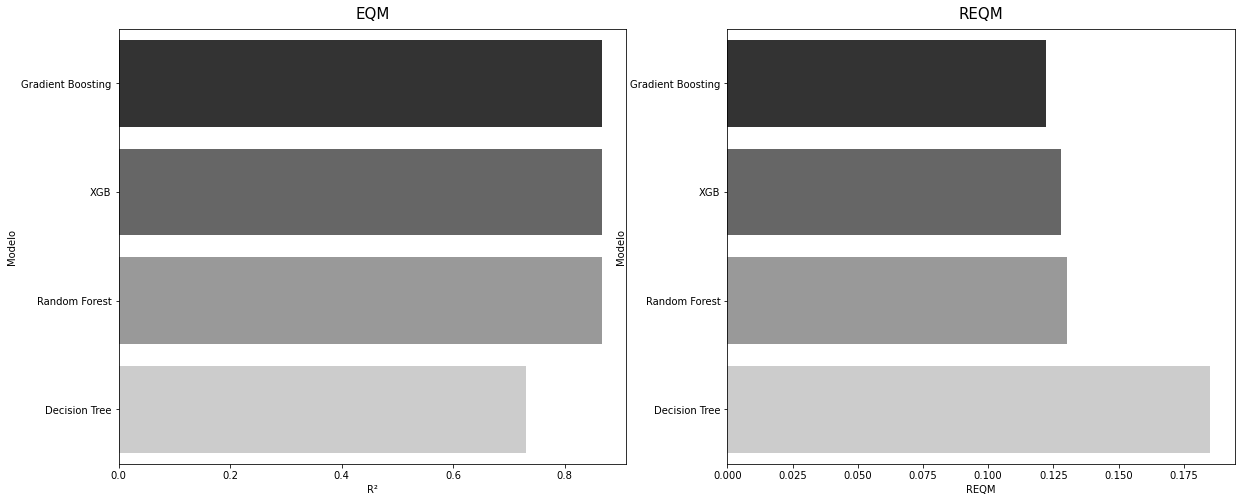

In [100]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8))

ax = sns.barplot(x='R²', y="Modelo", data=comparacao_modelos, palette='gist_gray', orient='h',ax=axis1).set_title('EQM', fontsize=15, pad=10)

ax = sns.barplot(x='REQM', y="Modelo", data=comparacao_modelos, palette='gist_gray', orient='h',ax=axis2).set_title('REQM',fontsize=15, pad=10)

In [97]:
melhores_resultados = comparacao_modelos.copy() #salvando para comparação nas demais seções
melhores_resultados

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8663,0.0149,0.1221
3,XGB,0.8663,0.0164,0.1281
1,Random Forest,0.8663,0.0170,0.1304
2,Decision Tree,0.7305,0.0343,0.1852


# **7 - Excluindo variáveis com baixa correlação**

Nesta seção tentaremos melhorar os resultados obtidos com a exclusão das variáveis pouco correlacionadas com a variável preço(SalePrice). Arbitrariamente escolherei o valor 0,10 e todas as variáveis com valores de correlação menores serão excluidas.

## **7.1 - Excluindo as variáveis com menor correlação**

In [101]:
#carreguei o arquivo novamente e alterei o nome da variável para não alterar a variável train usada anteriormente.
train_1 = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

Index(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

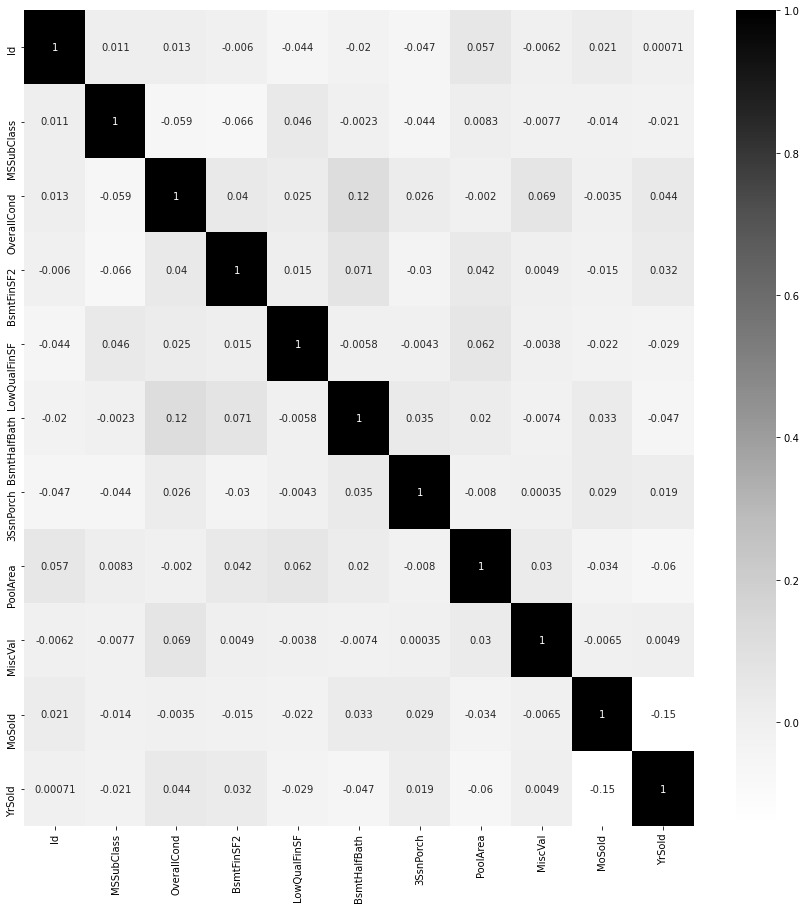

In [102]:
#variáveis com menores correlações com a variável alvo SalePrice
corr= train_1.corr()
menores_corr = corr.index[abs(corr["SalePrice"])<0.1] #pegando o nome das colunas com correlação > |0.5| cm a variável SalesPrice
display(menores_corr)

#Criando um heatmap de correlação com as variáveis <|0.1| com SalePrice
plt.figure(figsize=(15,15))
ax = sns.heatmap(train_1[menores_corr].corr(),annot=True,cmap="Greys")

In [103]:
#excluindo as colunas
tudo_junto_2 = tudo_junto.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch',
       'MiscVal', 'MoSold', 'YrSold'], axis=1)

In [104]:
#Como os data sets estão separados, também teremos que excluir as mesmas colunas no data set de submissão da competição

x_test_competição_I = x_test_competição.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch',
       'MiscVal', 'MoSold', 'YrSold'], axis=1)

## **7.2 - Aplicando os modelos**

In [105]:
x_train_1 =tudo_junto_2[:train_index] #usaremos em nosso modelo

#separar amostra de treino e teste
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(x_train_1, y_train, test_size=0.1, random_state=2021)

In [106]:
comparacao_modelos = pd.DataFrame(columns=['Modelo','R²','EQM',"REQM"]) 
# Esse Data Frame tem o objetivo de armazenar os valores das métricas para facilitar a comparação dos valores. Aqui limpamos os valores

### **7.2.1 - Decision Tree**

In [107]:
#aplicando na amostra de X_teste
#De acordo com a tabela de variação de parâmetros  maxdepth=50 e min_samples_split=2

tree_reg = DecisionTreeRegressor(random_state=2021, max_depth=50,min_samples_split=2)
tree_reg.fit(X_train_1,Y_train_1)
y_predict_tree =(tree_reg.predict(X_test_1))

#Calculando para a amostra de Teste
EQM = mean_squared_error(Y_test_1,y_predict_tree).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = (tree_reg.score(X_test_1,Y_test_1)).round(4)

comparar('Decision Tree',R2,EQM,REQM)

,Modelo,R²,EQM,REQM
0,Decision Tree,0.7353,0.0337,0.1836


In [108]:
melhores_resultados.query("Modelo == 'Decision Tree' " ) #para comparar com as métricas da modelagem anterior

,Modelo,R²,EQM,REQM
2,Decision Tree,0.7305,0.0343,0.1852


Comparando com os melhores resultados da seção anterior, vemos que o melhoramos! Logo atualizaremos a tabela melhores resultados.

In [112]:
melhores_resultados = melhores_resultados.replace([0.7305,0.0343,0.1852],(0.7353,0.0337,0.1836))


In [113]:
melhores_resultados

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8663,0.0149,0.1221
3,XGB,0.8663,0.0164,0.1281
1,Random Forest,0.8663,0.0170,0.1304
2,Decision Tree,0.7353,0.0337,0.1836


### **7.2.2 - Random Forest Regressor**

In [114]:
#De acordo com a tabela de variação de parâmetros  maxdepth=15 e min_samples_split=2
rand_for=RandomForestRegressor(max_depth=15,min_samples_split=2, random_state=2021)
rand_for.fit(X_train_1,Y_train_1)
y_predict_rand =((rand_for.predict(X_test_1)))

EQM = mean_squared_error(Y_test_1,y_predict_rand).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = (rand_for.score(X_test_1,Y_test_1)).round(4)

comparar('Random Forest',R2,EQM,REQM)

,Modelo,R²,EQM,REQM
1,Random Forest,0.8671,0.0169,0.1300
0,Decision Tree,0.7353,0.0337,0.1836


In [115]:
melhores_resultados.query("Modelo == 'Random Forest' " )

,Modelo,R²,EQM,REQM
1,Random Forest,0.8663,0.017,0.1304


Nesse caso o modelo obteve melhor desempenho precisamos atualizar os melhores_modelos.

In [118]:
melhores_resultados= melhores_resultados.replace([0.8663,0.017,0.1304],(0.8671,0.0169,0.1300))
melhores_resultados

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8671,0.0149,0.1221
3,XGB,0.8671,0.0164,0.1281
1,Random Forest,0.8671,0.0169,0.1300
2,Decision Tree,0.7353,0.0337,0.1836


### **7.2.3 Gradient Boost Regressor**

In [119]:
#De acordo com a tabela de variação de parâmetros  maxdepth=5 e min_samples_split=2
grad_b = GradientBoostingRegressor(max_depth=5,min_samples_split=2, random_state=2021)
grad_b.fit(X_train_1,Y_train_1)
y_predict_grad= grad_b.predict(X_test_1)

EQM = mean_squared_error(Y_test_1,y_predict_grad).round(4)
REQM = np.sqrt(EQM).round(4)

print(f"EQM = {EQM}, REQM = {REQM}, R² = {R2}",sep='\n')
comparar('Gradient Boosting',R2,EQM,REQM)

EQM = 0.0124, REQM = 0.1114, R² = 0.8671


,Modelo,R²,EQM,REQM
2,Gradient Boosting,0.8671,0.0124,0.1114
0,Random Forest,0.8671,0.0169,0.1300
1,Decision Tree,0.7353,0.0337,0.1836


In [120]:
melhores_resultados.query("Modelo == 'Gradient Boosting'")

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8671,0.0149,0.1221


In [ ]:
O Gradient Boosting obteve  melhor desempenho na métrica REQM excluindo as variáveis com baixa correlação! Agora esse resultado será usado como base. Será possível melhorá-lo?

In [122]:
melhores_resultados= melhores_resultados.replace([0.8671,0.0149,0.1221],(0.8671,0.0124,0.1114))
melhores_resultados

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8671,0.0124,0.1114
3,XGB,0.8671,0.0164,0.1281
1,Random Forest,0.8671,0.0169,0.1300
2,Decision Tree,0.7353,0.0337,0.1836


In [123]:
# gerando o arquivo de submissão na competição
y_predict_grad_II= np.expm1(grad_b.predict(x_test_competição_I))

sub_grad_II = pd.DataFrame({'Id':Id,'SalePrice':y_predict_grad_II})
sub_grad_II.to_csv('sub_grad_II.csv', index=False)

### **7.2.4 XGBoost Regressor**

In [124]:
#De acordo com a tabela de variação de parâmetros  maxdepth=5 e n_stimator=100
xgbr = XGBRegressor(max_depth=5, n_estimators=100, random_state=2021)                             
xgbr.fit(X_train_1,Y_train_1)
y_predict_xgbr = xgbr.predict(X_test_1)

EQM = mean_squared_error(Y_test_1,y_predict_xgbr).round(4)
REQM = np.sqrt(EQM).round(4)
R2 = (rand_for.score(X_test_1,Y_test_1)).round(4)

comparar('XGB',R2,EQM,REQM)

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8671,0.0124,0.1114
3,XGB,0.8671,0.0155,0.1245
1,Random Forest,0.8671,0.0169,0.1300
2,Decision Tree,0.7353,0.0337,0.1836


In [125]:
comparacao_modelos_1.query("Modelo == 'XGB'")

,Modelo,R²,EQM,REQM
3,XGB,0.8663,0.0164,0.1281


Nesse caso não conseguimos melhorar a métrica REQM ao excluir as variáveis com baixa correlação.

# **8 - .feature_importance_**

Usaremos o atributo .feature Importance nos Modelos Gradient Boosting e XGB já que até o momento apresentaram os melhores desempenhos. Conseguiremos melhorá-los?

O artigo abaixo lista algumas funções para melhorar a escolha de variáveis. Testaremos apenas o método _feature_importance e SelektBestPercentile. Vale a Leitura!

[Como selecionar as melhores features para seu modelo de Machine Learning](https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a)

Voltaremos aos modelos da seção 5. Em uma situaçaõ de problema nos mundo real a escolha dos valores dos hiperparâmetros deverriam ser realizadas novamente, como o intuito é didático não o faremos por questão de tempo.

## **8.1 - Gradient Boost**

In [126]:
comparacao_modelos = pd.DataFrame(columns=['Modelo','R²','EQM',"REQM"]) 
# Esse Data Frame tem o objetivo de armazenar os valores das métricas para facilitar a comparação dos valores. Aqui limpamos os valores

In [128]:
#modelo da seção 5
grad_b = GradientBoostingRegressor(max_depth=5,min_samples_split=2, random_state=2021)                            
grad_b.fit(X_train,Y_train)
y_predict = grad_b.predict(X_test)

**Usaremos o método feature importances que retorna um vetor com um valor da importância de cada Feature para  modelo. Posteriormente plotaremos em um gráfico.**

In [129]:
#selecionamos as features que são importantes para o modelo em pelo menos 1%
importance_feat= pd.DataFrame({'Coluna':X_train.columns,'Importância':grad_b.feature_importances_})

mais_imp=importance_feat.query('Importância > = 0.002').sort_values(ascending=False, by='Importância')

mais_imp['Coluna'].values

array(['OverallQual', 'TotalBsmtSF1stFlrSF2stFlrSF', 'GrLivArea',
       'GarageArea', 'YearRemodAdd', 'YearBuilt', 'LotArea',
       'OverallCond', 'BsmtFinSF1', 'CentralAir_Y', 'CentralAir_N',
       'KitchenQual_TA', 'BsmtUnfSF', 'GarageType_Detchd', 'MSZoning_RM',
       'Fireplaces', 'MSZoning_C (all)', 'GarageFinish_Unf',
       'BsmtQual_Ex', 'Neighborhood_Edwards', 'Neighborhood_Crawfor',
       'PavedDrive_N', 'SaleCondition_Abnorml', 'ExterQual_TA'],
      dtype=object)

In [130]:
mais_imp

,Coluna,Importância
1,OverallQual,0.419149
28,TotalBsmtSF1stFlrSF2stFlrSF,0.343041
10,GrLivArea,0.021219
18,GarageArea,0.018772
4,YearRemodAdd,0.017108
3,YearBuilt,0.016027
0,LotArea,0.015917
2,OverallCond,0.012144
6,BsmtFinSF1,0.011964
223,CentralAir_Y,0.010599


In [131]:
mais_imp['Importância'].values.sum() #+ de 94% de importância

0.9478161719262301

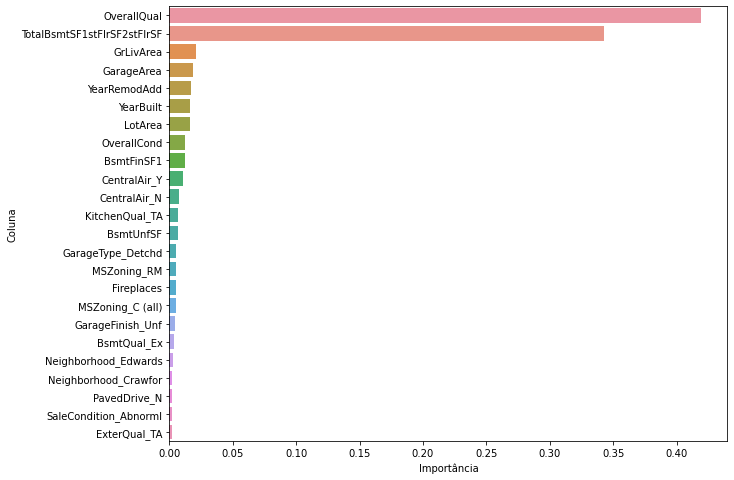

In [132]:
plt.figure(figsize=(10,8))
sns.barplot(x='Importância', y='Coluna',data=mais_imp, orient='h') #.set_title('Importância de cada feature'))
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
plt.show()

In [134]:
feat_grad_b=tudo_junto[:train_index]
feat_grad_b = feat_grad_b[mais_imp['Coluna'].values]

#separar amostra de treino e teste
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(feat_grad_b, y_train, test_size=0.1, random_state=2021)

In [135]:
#testando o modelo
grad_b = GradientBoostingRegressor(max_depth=5,min_samples_split=2, random_state=2021)  
grad_b.fit(X_train_2,Y_train_2)
y_predict = grad_b.predict(X_test_2)

EQM = mean_squared_error(Y_test_2,y_predict).round(4)
REQM = np.sqrt(EQM).round(4)

R2 = (grad_b.score(X_test_2,Y_test_2)).round(4)

#print(f"EQM = {EQM}, REQM = {REQM}, R² = {R2}",sep='\n')

print( f'O número de colunas a menos é de {tudo_junto.shape[1]- feat_grad_b.shape[1]}')
comparar('Gradient Boosting',R2,EQM,REQM)

O número de colunas a menos é de 253


,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8792,0.0154,0.1241


In [137]:
melhores_resultados.query('Modelo == "Gradient Boosting"')

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8671,0.0124,0.1114


Com 253 colunas a menos os valores das métricas pouco variaram mas não conseguimos melhorar o resultado do modelo.

## **8.2 - XGB Boosting Regressor**

In [138]:
#De acordo com a tabela de variação de parâmetros  maxdepth=5 e n_stimator=100
xgbr = XGBRegressor(max_depth=5, n_estimators=100, random_state=2021)                             
xgbr.fit(X_train,Y_train)
y_predict_xgbr = xgbr.predict(X_test)

In [139]:
#selecionamos as features que são importantes para o modelo em pelo menos 1%
importance_feat= pd.DataFrame({'Coluna':tudo_junto.columns,'Importância':xgbr.feature_importances_})

mais_imp=importance_feat.query('Importância > = 0.0015').sort_values(ascending=False, by='Importância')

mais_imp['Coluna'].values

mais_imp['Importância'].values.sum()

0.9348233

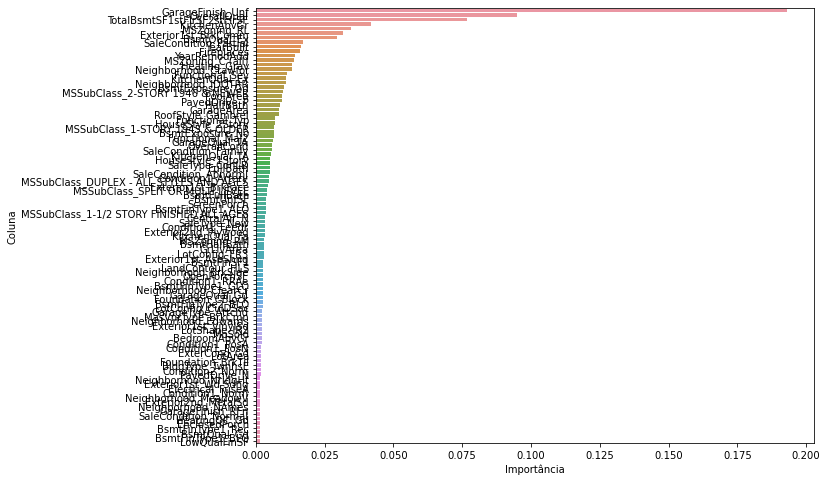

In [140]:
plt.figure(figsize=(10,8))
sns.barplot(x='Importância', y='Coluna',data=mais_imp, orient='h') #.set_title('Importância de cada feature'))
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
plt.show()

In [141]:
feat_xgbr=tudo_junto[:train_index]
feat_xgbr = feat_xgbr[mais_imp['Coluna'].values]

#separar amostra de treino e teste
X_train_3,X_test_3,Y_train_3,Y_test_3 = train_test_split(feat_xgbr, y_train, test_size=0.1, random_state=2021)

In [142]:
#testando o modelo
xgbr = XGBRegressor(max_depth=5, n_estimators=100, random_state=2021)    
xgbr.fit(X_train_3,Y_train_3)
y_predict = xgbr.predict(X_test_3)

EQM = mean_squared_error(Y_test_3,y_predict).round(4)
REQM = np.sqrt(EQM).round(4)

R2 = (xgbr.score(X_test_3,Y_test_2)).round(4)

#print(f"EQM = {EQM}, REQM = {REQM}, R² = {R2}",sep='\n')

print( f'O número de colunas a menos é de {tudo_junto.shape[1]- feat_xgbr.shape[1]}')
comparar('XGB',R2,EQM,REQM)

O número de colunas a menos é de 180


,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8792,0.0154,0.1241
1,XGB,0.8664,0.0170,0.1304


In [143]:
melhores_resultados.query('Modelo == "XGB"')

,Modelo,R²,EQM,REQM
3,XGB,0.8671,0.0164,0.1281


Novamente pouca variação mesmo eliminando 177 colunas de dados mas não conseguimos melhorar o resultado dos modelo.

# **9 - SelectKbestPercentile**
Quantos % das variáveis explicativas são as maiores responsáveis pelo preço?
É o que vamos investigar nessa seção com a abordagem SelectKbestPercentile.
Didaticamente vamos variar o percentual de 10 a 100 e traçar um gráfico para analisarmos como a Raiz do Erro Quadrático se comporta em função do tamanho das variáveis.

In [144]:
from sklearn.feature_selection import SelectPercentile, f_regression

In [145]:
x = list(range(10,101,1))

## **Decision Tree**

In [150]:
select_best_percent = pd.DataFrame(columns=['%','R²','EQM',"REQM"]) 

for i in x:
  
    
    select_best= SelectPercentile(f_regression, percentile=i)
    x_train_new = select_best.fit_transform(x_train, y_train)

    #separando as variáveis de teste e treino
    X_train_4,X_test_4,Y_train_4,Y_test_4 = train_test_split(x_train_new, y_train, test_size=0.1, random_state=2021)

    tree_reg = DecisionTreeRegressor(random_state=2021, max_depth=20,min_samples_split=2)  
    tree_reg.fit(X_train_4,Y_train_4)
    y_predict = tree_reg.predict(X_test_4)

    EQM = mean_squared_error(Y_test_4,y_predict).round(4)
    REQM = np.sqrt(EQM).round(4)
    R2 = (tree_reg.score(X_test_4,Y_test_4)).round(4)  

    select_best_percent= select_best_percent.append({'%':i,'R²': R2,'EQM':EQM,'REQM':REQM }, ignore_index=True)



/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

<AxesSubplot:xlabel='%', ylabel='REQM'>

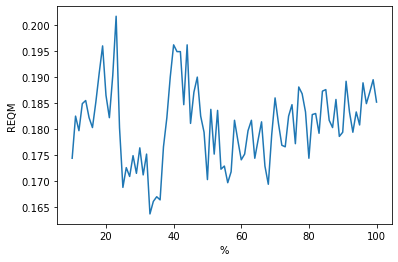

In [149]:
sns.lineplot(x='%',y='REQM', data=select_best_percent)

In [147]:
select_best_percent.sort_values(by='REQM').head(10)

,%,R²,EQM,REQM
23,33.0,0.7889,0.0268,0.1637
24,34.0,0.7826,0.0276,0.1661
26,36.0,0.7818,0.0277,0.1664
25,35.0,0.7806,0.0279,0.1670
15,25.0,0.7755,0.0285,0.1688
58,68.0,0.7744,0.0287,0.1694
46,56.0,0.7733,0.0288,0.1697
40,50.0,0.7719,0.0290,0.1703
17,27.0,0.7707,0.0292,0.1709
21,31.0,0.7692,0.0293,0.1712


In [148]:
melhores_resultados.query('Modelo == "Decision Tree"')

,Modelo,R²,EQM,REQM
2,Decision Tree,0.7353,0.0337,0.1836


In [151]:
#atualizando
melhores_resultados= melhores_resultados.replace([0.7353,0.0337,0.1836],(0.7889,0.0268,0.1637))
melhores_resultados

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8671,0.0124,0.1114
3,XGB,0.8671,0.0164,0.1281
1,Random Forest,0.8671,0.0169,0.1300
2,Decision Tree,0.7889,0.0268,0.1637


Interessante notar que com 33% dos dados os resultados são melhores do que com mais dados, curioso.

## **Random Forest**

In [154]:
select_best_percent = pd.DataFrame(columns=['%','R²','EQM',"REQM"]) 

for i in x:
  
    select_best= SelectPercentile(f_regression, percentile=i)
    x_train_new = select_best.fit_transform(x_train, y_train)

    #separando as variáveis de teste e treino
    X_train_4,X_test_4,Y_train_4,Y_test_4 = train_test_split(x_train_new, y_train, test_size=0.1, random_state=2021)

    rand_for = RandomForestRegressor(max_depth=50,min_samples_split=2, random_state=2021)   
    rand_for.fit(X_train_4,Y_train_4)
    y_predict = rand_for.predict(X_test_4)

    EQM = mean_squared_error(Y_test_4,y_predict).round(4)
    REQM = np.sqrt(EQM).round(4)
    R2 = (rand_for.score(X_test_4,Y_test_4)).round(4)  

    select_best_percent= select_best_percent.append({'%':i,'R²': R2,'EQM':EQM,'REQM':REQM }, ignore_index=True)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

<AxesSubplot:xlabel='%', ylabel='REQM'>

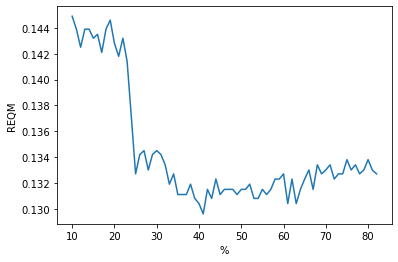

In [153]:
sns.lineplot(x='%',y='REQM', data=select_best_percent)

In [155]:
select_best_percent.sort_values(by='REQM').head(10)

,%,R²,EQM,REQM
31,41.0,0.8678,0.0168,0.1296
90,100.0,0.8663,0.0170,0.1304
53,63.0,0.8664,0.0170,0.1304
51,61.0,0.8660,0.0170,0.1304
30,40.0,0.8662,0.0170,0.1304
29,39.0,0.8658,0.0171,0.1308
44,54.0,0.8652,0.0171,0.1308
43,53.0,0.8655,0.0171,0.1308
33,43.0,0.8653,0.0171,0.1308
27,37.0,0.8649,0.0172,0.1311


In [156]:
melhores_resultados.query('Modelo == "Random Forest"')

,Modelo,R²,EQM,REQM
1,Random Forest,0.8671,0.0169,0.13


O resultado das predições melhoraram ao usar apenas 41% das variáveis obtivemos melhores resultados.

In [159]:
#atualizando
melhores_resultados= melhores_resultados.replace([0.8671,0.0169,0.13],(0.8678,0.0168,0.1296))
melhores_resultados

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8678,0.0124,0.1114
3,XGB,0.8678,0.0164,0.1281
1,Random Forest,0.8678,0.0168,0.1296
2,Decision Tree,0.7889,0.0268,0.1637


## **Gradient Boost**

In [157]:
select_best_percent = pd.DataFrame(columns=['%','R²','EQM',"REQM"]) 

for i in x:
  
    select_best= SelectPercentile(f_regression, percentile=i)
    x_train_new = select_best.fit_transform(x_train, y_train)

    #separando as variáveis de teste e treino
    X_train_4,X_test_4,Y_train_4,Y_test_4 = train_test_split(x_train_new, y_train, test_size=0.1, random_state=2021)

    grad_b = GradientBoostingRegressor(max_depth=5,min_samples_split=2, random_state=2021)  
    grad_b.fit(X_train_4,Y_train_4)
    y_predict = grad_b.predict(X_test_4)

    EQM = mean_squared_error(Y_test_4,y_predict).round(4)
    REQM = np.sqrt(EQM).round(4)
    R2 = (grad_b.score(X_test_4,Y_test_4)).round(4)  

    select_best_percent= select_best_percent.append({'%':i,'R²': R2,'EQM':EQM,'REQM':REQM }, ignore_index=True)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

<AxesSubplot:xlabel='%', ylabel='REQM'>

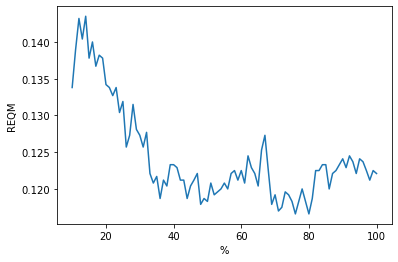

In [160]:
sns.lineplot(x='%',y='REQM', data=select_best_percent)

In [161]:
select_best_percent.sort_values(by='REQM').head(10)

,%,R²,EQM,REQM
70,80.0,0.8927,0.0136,0.1166
66,76.0,0.8927,0.0136,0.1166
61,71.0,0.8923,0.0137,0.1170
62,72.0,0.8916,0.0138,0.1175
38,48.0,0.8904,0.0139,0.1179
59,69.0,0.8906,0.0139,0.1179
40,50.0,0.8897,0.0140,0.1183
69,79.0,0.8896,0.0140,0.1183
67,77.0,0.8896,0.0140,0.1183
65,75.0,0.8902,0.0140,0.1183


In [163]:
melhores_resultados.query('Modelo == "Gradient Boosting"')

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8678,0.0124,0.1114


Com 76% das variáveis obtemos o melhor resultado para o Modelo GradientBoostingRegressor mas não conseguimos melhorar o modelo.

## **XGB**

In [164]:
select_best_percent = pd.DataFrame(columns=['%','R²','EQM',"REQM"]) 

for i in x:
   
    select_best= SelectPercentile(f_regression, percentile=i)
    x_train_new = select_best.fit_transform(x_train, y_train)

    #separando as variáveis de teste e treino
    X_train_4,X_test_4,Y_train_4,Y_test_4 = train_test_split(x_train_new, y_train, test_size=0.1, random_state=2021)

    xgbr = XGBRegressor(max_depth=5, n_estimators=100, random_state=2021)    
    xgbr.fit(X_train_4,Y_train_4)
    y_predict = xgbr.predict(X_test_4)

    EQM = mean_squared_error(Y_test_4,y_predict).round(4)
    REQM = np.sqrt(EQM).round(4)
    R2 = (xgbr.score(X_test_4,Y_test_4)).round(4)  

    select_best_percent= select_best_percent.append({'%':i,'R²': R2,'EQM':EQM,'REQM':REQM }, ignore_index=True)



/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divid

<AxesSubplot:xlabel='%', ylabel='REQM'>

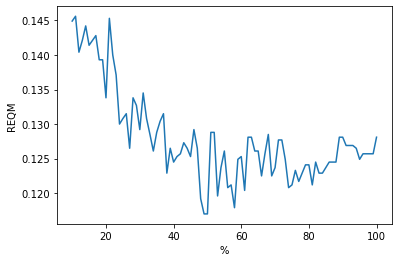

In [165]:
sns.lineplot(x='%',y='REQM', data=select_best_percent)

In [166]:
select_best_percent.sort_values(by='REQM').head(10)

,%,R²,EQM,REQM
39,49.0,0.8922,0.0137,0.1170
40,50.0,0.8922,0.0137,0.1170
48,58.0,0.8910,0.0139,0.1179
38,48.0,0.8880,0.0142,0.1192
43,53.0,0.8879,0.0143,0.1196
51,61.0,0.8862,0.0145,0.1204
46,56.0,0.8852,0.0146,0.1208
64,74.0,0.8852,0.0146,0.1208
65,75.0,0.8844,0.0147,0.1212
71,81.0,0.8847,0.0147,0.1212


In [168]:
melhores_resultados.query('Modelo == "XGB"')

,Modelo,R²,EQM,REQM
3,XGB,0.8678,0.0164,0.1281


O XGBRegressor obteve melhor resultado com 49% do conjunto de dados e melhorou o resultado anterior!

In [169]:
#atualizando
melhores_resultados= melhores_resultados.replace([0.8678,0.0164,0.1281],(0.8922,0.0137,0.1170))
melhores_resultados

,Modelo,R²,EQM,REQM
0,Gradient Boosting,0.8922,0.0124,0.1114
3,XGB,0.8922,0.0137,0.1170
1,Random Forest,0.8922,0.0168,0.1296
2,Decision Tree,0.7889,0.0268,0.1637


# **10 - Conclusão**
Submetemos nossos resultados no Kaggle ficando entre o top 35%. Uma posição satisfatória.

Abaixo comparamos nossos resultados com os resultados obtidos na competição.


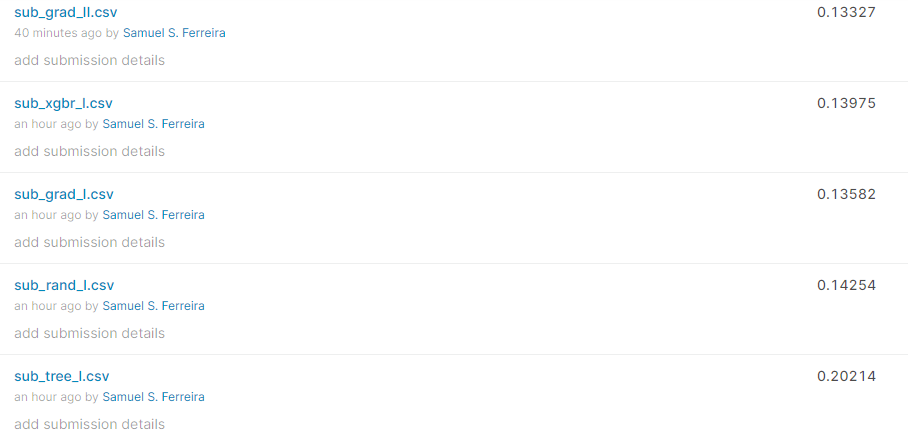

In [170]:
melhores_resultados['Kaggle'] = [0.13975, 0.13327,0.14254,0.20214]
melhores_resultados[['Modelo','REQM','Kaggle']].sort_values(by='Kaggle')

,Modelo,REQM,Kaggle
3,XGB,0.1170,0.13327
0,Gradient Boosting,0.1114,0.13975
1,Random Forest,0.1296,0.14254
2,Decision Tree,0.1637,0.20214


Conseguimos melhorar os resultados ao aplicar novas técnicas no conjunto de variáveis explicativas como exclusão das variáveis com baixa correlação, _feature_importance e a função SelectBestPercentile.

Analisando os resultados de outros competidores vemos que ainda é possível melhorar as métricas. Topa o desafio?  :D